# Phase estimation and factoring

## Introduction

In this lesson we'll discuss the phase estimation problem and a quantum algorithm to solve it.
We'll then apply the solution to obtain [*Shor's algorithm*][shor-algorithm-comment] — an efficient quantum algorithm for the integer factorization problem.

[shor-algorithm-comment]: #definition-tooltip "In addition to his integer factorization algorithm, Peter Shor also discovered an efficient quantum algorithm for the different but related problem of computing *discrete logarithms*.
The two algorithms appeared in the same paper, first published as a conference paper in 1994 and then as a journal paper in 1997."

Along the way, we'll encounter the quantum Fourier transform, and we'll see how it can be implemented efficiently by a quantum circuit.

## Phase estimation problem

This section explains the *phase estimation problem*.
We'll begin with a short discussion of the *spectral theorem* from linear algebra, and then move on to a statement of the phase estimation problem itself.

### Spectral theorem

The *spectral theorem* is an important fact in linear algebra that states that matrices of a certain type (called *normal matrices*) can be expressed in a simple and useful way.
We're only going to use this theorem for unitary matrices in this lesson, but later on we'll need it for Hermitian matrices as well.

*Normal matrices*

Suppose that $M$ is an $n\times n$ matrix with complex number entries.
We say that $M$ is a *normal* matrix if it commutes with its conjugate transpose:
$M M^{\dagger} = M^{\dagger} M.$

Every unitary matrix $U$ is normal because

$$
U U^{\dagger} = \I = U^{\dagger} U.
$$

Hermitian matrices, which are matrices that equal their own conjugate transpose, are another important class of normal matrices.
If $H$ is a Hermitian matrix, then

$$
H H^{\dagger} = H^2 = H^{\dagger} H,
$$ 

so $H$ is normal.
We'll see the spectral theorem being applied to Hermitian matrices later in the series.

Not every square matrix is normal.
For instance, this matrix isn't normal:

$$
\begin{pmatrix}
0 & 1\\
0 & 0
\end{pmatrix}
$$

(This is a simple but great example of a matrix that's always good to keep in mind.)
This matrix isn't normal because

$$
\begin{pmatrix}
0 & 1\\
0 & 0
\end{pmatrix}
\begin{pmatrix}
0 & 1\\
0 & 0
\end{pmatrix}^{\dagger}
=
\begin{pmatrix}
0 & 1\\
0 & 0
\end{pmatrix}
\begin{pmatrix}
0 & 0\\
1 & 0
\end{pmatrix}
=
\begin{pmatrix}
1 & 0\\
0 & 0
\end{pmatrix}
$$

while

$$
\begin{pmatrix}
0 & 1\\
0 & 0
\end{pmatrix}^{\dagger}
\begin{pmatrix}
0 & 1\\
0 & 0
\end{pmatrix}
=
\begin{pmatrix}
0 & 0\\
1 & 0
\end{pmatrix}
\begin{pmatrix}
0 & 1\\
0 & 0
\end{pmatrix}
=
\begin{pmatrix}
0 & 0\\
0 & 1
\end{pmatrix}.
$$

*Theorem statement*

Now here's a statement of the spectral theorem.

> **Theorem** (spectral theorem) \
> Let $M$ be a *normal* $N\times N$ complex matrix.
> There exists an orthonormal basis of $N$ dimensional complex vectors $\bigl\{ \vert\psi_1\rangle,\ldots,\vert\psi_N\rangle \bigr\}$ along with complex numbers $\lambda_1,\ldots,\lambda_N$ such that $M = \lambda_1 \vert \psi_1\rangle\langle \psi_1\vert + \cdots + \lambda_N \vert \psi_N\rangle\langle \psi_N\vert.$

The expression of a matrix in the form

$$
M = \sum_{k = 1}^N \lambda_k \vert \psi_k\rangle\langle \psi_k\vert \tag{1}
$$

is commonly called a *spectral decomposition*.
Notice that if $M$ is a normal matrix expressed in the form $(1),$ then the equation

$$ 
M \vert \psi_j \rangle = \lambda_j \vert \psi_j \rangle
$$

must true for every $j = 1,\ldots,N.$
This is a consequence of the fact that $\bigl\{ \vert\psi_1\rangle,\ldots,\vert\psi_N\rangle \bigr\}$ is orthonormal:

$$ 
M \vert \psi_j \rangle 
= \left(\sum_{k = 1}^N \lambda_k \vert \psi_k\rangle\langle \psi_k\vert\right)\vert \psi_j\rangle
= \sum_{k = 1}^n \lambda_k \vert \psi_k\rangle\langle \psi_k\vert\psi_j \rangle
= \lambda_j \vert\psi_j \rangle
$$

That is to say, each number $\lambda_j$ is an *eigenvalue* of $M$ and $\vert\psi_j\rangle$ is an *eigenvector* corresponding to that eigenvalue.

 - **Example 1**.
   Let
   
   $$
   \I = \begin{pmatrix}1 & 0\\0 & 1\end{pmatrix},
   $$
   
   which is normal.
   The theorem implies that $\I$ can be written in the form $(1)$ for some choice 
   of $\lambda_1,$ $\lambda_2,$ $\vert\psi_1\rangle,$ and $\vert\psi_2\rangle$ — and in particular 
   the equation is true for

   $$
   \lambda_1 = 1, \hspace{5pt} 
   \lambda_2 = 1, \hspace{5pt} 
   \vert\psi_1\rangle = \vert 0\rangle, \hspace{5pt}
   \vert\psi_2\rangle = \vert 1\rangle.
   $$
   
   (Notice that the theorem does not say that the complex numbers $\lambda_1,\ldots,\lambda_n$ are 
   distinct — we can have the same complex number repeated.)
   
   These choices work because
   $$
   \I = \vert 0\rangle\langle 0\vert + \vert 1\rangle\langle 1\vert.
   $$
   
   Indeed, we could choose $\{\vert\psi_1\rangle,\vert\psi_2\rangle\}$ to be *any* orthonormal basis and the 
   equation will be true. For instance,
   
   $$
   \I = \vert +\rangle\langle +\vert + \vert -\rangle\langle -\vert.
   $$

 - **Example 2**. Consider a Hadamard operation.

   $$
   H = \frac{1}{\sqrt{2}}
   \begin{pmatrix}
   1 & 1\\[1mm] 
   1 & -1
   \end{pmatrix}
   $$
   
   This is a unitary matrix, so it is normal. The spectral theorem implies that $H$ can be written in the 
   form $(1),$ and in particular we have

   $$
   H = 
   \vert\psi_{\pi/8}\rangle \langle \psi_{\pi/8}\vert 
   - \vert\psi_{5\pi/8}\rangle \langle \psi_{5\pi/8}\vert
   $$
   
   where
   
   $$
   \vert\psi_{\theta}\rangle 
   = \cos(\theta)\vert 0\rangle + \sin(\theta) \vert 1\rangle.
   $$

   More explicitly,
   
   $$
   \begin{aligned}
   \vert\psi_{\pi/8}\rangle & = \frac{\sqrt{2 + \sqrt{2}}}{2}\vert 0\rangle 
   + \frac{\sqrt{2 - \sqrt{2}}}{2}\vert 1\rangle \\[3mm]
   \vert\psi_{5\pi/8}\rangle & = -\frac{\sqrt{2 - \sqrt{2}}}{2}\vert 0\rangle 
   + \frac{\sqrt{2 + \sqrt{2}}}{2}\vert 1\rangle.
   \end{aligned}
   $$

   We can check that this decomposition is correct by performing the required calculations:
   
   $$
   \vert\psi_{\pi/8}\rangle \langle \psi_{\pi/8}\vert 
   - \vert\psi_{5\pi/8}\rangle \langle \psi_{5\pi/8}\vert
   = \begin{pmatrix}
   \frac{2 + \sqrt{2}}{4} & \frac{\sqrt{2}}{4}\\[2mm]
   \frac{\sqrt{2}}{4} & \frac{2 - \sqrt{2}}{4}
   \end{pmatrix}
   -
   \begin{pmatrix}
   \frac{2 - \sqrt{2}}{4} & -\frac{\sqrt{2}}{4}\\[2mm]
   -\frac{\sqrt{2}}{4} & \frac{2 + \sqrt{2}}{4}
   \end{pmatrix}
   = H.
   $$
   
   We can also use Qiskit to check that this decomposition is correct, as the following code cell demonstrates.

In [1]:
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator
import math

psi1 = Statevector([math.cos(math.pi/8),math.sin(math.pi/8)])
psi2 = Statevector([math.cos(5*math.pi/8),math.sin(5*math.pi/8)])

# When given a Statevector input, the Operator function returns the outer
# product of that state vector with itself — or, in other words, the
# product of the vector times its conjugate transpose.

H = Operator(psi1) - Operator(psi2)
array_to_latex(H)

<IPython.core.display.Latex object>

As the first example reveals, there can be some freedom in how eigenvectors are selected.
There is, however, no freedom at all in how the eigenvalues are chosen (except for their ordering).
For any given matrix $M,$ the same $n$ complex numbers $\lambda_1,\ldots,\lambda_N$ (which can include repetitions of the same complex number) will always occur in the equation $(1).$

Now let's focus in on unitary matrices.
Using the same terminology that was just mentioned, if we have a complex number $\lambda$ and a non-zero vector $\vert\psi\rangle$ that satisfy the equation

$$
U\vert\psi\rangle = \lambda\vert\psi\rangle,
\tag{2}
$$

then we say that $\lambda$ is an *eigenvalue* of $U$ and $\vert\psi\rangle$ is an *eigenvector* corresponding to the eigenvalue $\lambda.$

Unitary matrices preserve Euclidean norm.
So, if the equation $(2)$ is true, then because $U$ is unitary we conclude

$$
\bigl\| \vert\psi\rangle \bigr\|
= \bigl\| U \vert\psi\rangle \bigr\|
= \bigl\| \lambda \vert\psi\rangle \bigr\|
= \vert \lambda \vert \bigl\| \vert\psi\rangle \bigr\|.
$$

The condition that $\vert\psi\rangle$ is non-zero implies that $\bigl\| \vert\psi\rangle \bigr\|\not=0,$ so we can cancel it from both sides to obtain

$$
\vert \lambda \vert = 1.
$$

So, eigenvalues of unitary matrices must always have absolute value equal to one.
That is to say, they lie on the *unit circle* 

$$
\mathbb{T} = \{\alpha\in\mathbb{C} : \vert\alpha\vert = 1\}.
$$

The symbol $\mathbb{T}$ is a common name for the complex unit circle.
The name is $S^1$ is also common.

### Problem statement

In the *phase estimation problem*, we're given a quantum state $\vert \psi\rangle$ of $n$ qubits, along with a unitary quantum circuit that acts on $n$ qubits.
We're *promised* that $\vert \psi\rangle$ is an eigenvector of the unitary matrix $U$ that describes the action of the circuit, and our goal is to either identify or approximate the eigenvalue $\lambda$ to which $\vert \psi\rangle$ corresponds.

More precisely, because $\lambda$ lies on the complex unit circle we can write

$$
\lambda = e^{2\pi i \theta}
$$

for a unique real number $\theta$ satisfying $0\leq\theta<1.$
The goal of the problem is to compute or approximate this real number $\theta.$

> **Phase estimation problem**\
> Input: An $n$ qubit quantum state $\vert\psi\rangle$ and a unitary quantum circuit for an $n$-qubit operation $U$\
> Promise: $\vert\psi\rangle$ is an eigenvector of $U$\
> Output: an approximation to the number $\theta\in[0,1)$ satisfying $U\vert\psi\rangle = e^{2\pi i \theta}\vert\psi\rangle$

<br>

*Remarks*

1. The phase estimation problem is different from other problems we've seen so far in the series in that the input includes a quantum state. Typically we're focused on problems having classical inputs and outputs, but nothing prevents us from considering quantum state inputs like this. In terms of its practical relevance, the phase estimation problem tends to appear as a *subproblem* inside of larger computations. We'll see this happening in the context of integer factorization later in the lesson.

2. The statement of the phase estimation problem above isn't specific about what constitutes an approximation of $\theta,$ but we can formulate more precise problem statements depending on our needs and interests. In the context of integer factorization we'll demand a very precise approximation to $\theta,$ but in other cases we might be satisfied with a very rough approximation. We'll discuss shortly how the precision we require affects the computational cost of a solution.

3. Notice that as we go from $\theta = 0$ toward $\theta = 1$ in the phase estimation problem, we're going all the way around the unit circle, starting from $e^{2\pi i \cdot 0} = 1$ and moving counter-clockwise — and as we get closer to $\theta = 1$ we're moving toward $e^{2\pi i \cdot 1} = 1,$ which is back where we started at $\theta = 0.$ So, as we consider the accuracy of approximations, choices of $\theta$ near $1$ should be considered as being near $0.$ For example, an approximation $\theta = 0.999$ should be considered as being within $1/1000$ of $\theta = 0.$

## Phase estimation procedure

Next we'll discuss the *phase-estimation procedure*, which is a quantum algorithm for solving the phase estimation problem.
We'll begin with a low-precision warm-up, which explains some of the basic intuition behind the method.
We'll then talk about the *quantum Fourier transform*, which is an important quantum operation used in the phase-estimation procedure, as well as its quantum circuit implementation.
And finally, we'll describe the phase-estimation procedure in general and analyze its performance.

### Warm-up: approximating phases with low precision

We'll begin with a warm-up: a couple of simple versions of the phase-estimation procedure that provide low-precision solutions to the phase-estimation problem.
This is helpful for explaining the intuition behind the general procedure that we'll see a bit later in the lesson.

*Using the phase kickback*

A simple approach to the phase-estimation problem, which allows us to learn something about the value $\theta$ we seek, is based on the *phase kick-back* phenomenon.
As we will see, this is essentially a single-qubit version of the general phase-estimation procedure to be discussed later in the lesson.

As part of the input to the phase estimation problem, we have a unitary quantum circuit for the operation $U.$
We can use the description of this circuit to create a circuit for a *controlled*-$U$ operation, which can be depicted as this figure suggests (with the operation $U,$ viewed as a quantum gate, on the left and a controlled-$U$ operation on the right).

![Uncontrolled and controlled versions of a unitary operation](images/uncontrolled-and-controlled-unitary.png)

We can create a quantum circuit for a controlled-$U$ operation by first adding a control qubit to the circuit for $U,$ and then replacing every gate in the circuit for $U$ with a controlled version of that gate — so our one new control qubit effectively controls every single gate in the circuit for $U.$
This requires that we have a controlled version of every gate in our circuit, but if we want to restrict ourselves to a standard gate set, we can always build circuits for these controlled operations rather than insisting that they're single gates.

Now let's consider the following circuit, where the input state $\vert\psi\rangle$ of all the qubits except the top one is the quantum state eigenvector of $U:$

![A single-qubit circuit for phase-estimation](images/estimate-phase-with-kickback.png)

The eigenvalue of $U$ corresponding to the eigenvector $\vert\psi\rangle$ determines the measurement outcome probabilities.
To see exactly how, let's analyze the circuit.

![States of a single-qubit circuit for phase-estimation](images/estimate-phase-with-kickback-analysis.png)

The initial state of the circuit is

$$
\vert\pi_0\rangle = \vert\psi\rangle \vert 0\rangle
$$

and the first Hadamard gate transforms this state to

$$
\vert\pi_1\rangle = \vert\psi\rangle \vert +\rangle 
= \frac{1}{\sqrt{2}} \vert\psi\rangle \vert 0\rangle + \frac{1}{\sqrt{2}} \vert\psi\rangle \vert 1\rangle.
$$

Next, the controlled-$U$ operation is performed, which results in the state

$$
\vert\pi_2\rangle 
= \frac{1}{\sqrt{2}} \vert\psi\rangle \vert 0\rangle + \frac{1}{\sqrt{2}} \bigl(U \vert\psi\rangle\bigr) \vert 1\rangle.
$$

Using the assumption that $\vert\psi\rangle$ is an eigenvector of $U$ having eigenvalue $\lambda = e^{2\pi i\theta},$
we can alternatively express this state as follows.

$$
\vert\pi_2\rangle
= \frac{1}{\sqrt{2}} \vert\psi\rangle \vert 0\rangle + \frac{e^{2\pi i \theta}}{\sqrt{2}} \vert\psi\rangle \vert 1\rangle = \vert\psi\rangle \otimes \left( \frac{1}{\sqrt{2}} \vert 0\rangle + \frac{e^{2\pi i \theta}}{\sqrt{2}} \vert 1\rangle\right)
$$

Here we see the phase kickback phenomenon taking place.
It is slightly different this time than it was for Deutsch's algorithm and the Deutsch-Jozsa algorithm because we're not working with a query gate — but the idea is the similar.

Finally, the second Hadamard gate is performed, which results in the state

$$
\vert\pi_3\rangle
= \vert\psi\rangle \otimes \left( \frac{1+ e^{2\pi i \theta}}{2} \vert 0\rangle + \frac{1 - e^{2\pi i \theta}}{2} \vert 1\rangle\right).
$$

The measurement therefore yields the outcomes $0$ and $1$ with these probabilities:

$$
\begin{aligned}
p_0 &= \left\vert \frac{1+ e^{2\pi i \theta}}{2} \right\vert^2 = \cos^2(\pi\theta)\\[1mm]
p_1 &= \left\vert \frac{1- e^{2\pi i \theta}}{2} \right\vert^2 = \sin^2(\pi\theta).
\end{aligned}
$$

Here's a table that lists the probabilities for the two possible measurement outcomes for various choices of the number $\theta.$

| $$\theta$$ | $$\cos^2(\pi\theta)$$ | $$\sin^2(\pi\theta)$$ |
| :--: | :--: | :--: |
| 0.0000 | 1.0000 | 0.0000 |
| 0.1250 | 0.8536 | 0.1464 |
| 0.2500 | 0.5000 | 0.5000 |
| 0.3750 | 0.1464 | 0.8536 |
| 0.5000 | 0.0000 | 1.0000 |
| 0.6250 | 0.1464 | 0.8536 |
| 0.7500 | 0.5000 | 0.5000 |
| 0.8750 | 0.8536 | 0.1464 |

We can also plot the probabilities for the two possible outcomes, $0$ and $1,$ as follows:

![Outcome probabilities from phase kickback](images/kickback-probabilities.png)

Naturally, the two probabilities always sum to $1.$
Notice that when $\theta = 0,$ the measurement outcome is always $0,$ and when $\theta = 1/2,$ the measurement outcome is always $1.$
So, although the measurement result doesn't reveal exactly what $\theta$ is, it does provide us with some information about it — and if we were promised that either $\theta = 0$ or $\theta = 1/2,$ we could learn from the circuit which one is correct without error.

Intuitively speaking, we can think of the circuit's measurement outcome as being a guess for $\theta$ to "one bit of accuracy."
In other words, if we were to write $\theta$ in *binary notation* and round it off to one bit after the [binary point][binary-point], we'd have a number like this:

$$
0.a = \begin{cases}
0 & a = 0\\
\frac{1}{2} & a = 1.
\end{cases}
$$

[binary-point]: #definition-tooltip "The *binary point* is analogous to the *decimal point* when we express numbers with a fractional part in ordinary, decimal notation."

The measurement outcome can be viewed as a guess for the bit $a.$
When $\theta$ is neither $0$ nor $1/2,$ there's a nonzero probability that the guess will be wrong — but the 
probability of making an error becomes smaller and smaller as we get closer to $0$ or $1/2.$

It's natural to ask what role the two Hadamard gates play in this procedure:

 - The first Hadamard gate sets the control qubit to a uniform superposition of $\vert 0\rangle$ and $\vert 1\rangle,$ so that when the phase kickback occurs, it happens for the $\vert 1\rangle$ state and not the $\vert 0\rangle$ state, creating a *relative* phase difference that affects the measurement outcomes. If we didn't do this and the phase kickback produced a *global* phase, it would have no effect on the probabilities of obtaining different measurement outcomes.

 - The second Hadamard gate allows us to learn something about the number $\theta$ through the phenomenon of *interference*. Prior to the second Hadamard gate, the state of the top qubit is

   $$
   \frac{1}{\sqrt{2}} \vert 0\rangle + \frac{e^{2\pi i \theta}}{\sqrt{2}} \vert 1\rangle,
   $$

   and if we were to measure this state, we would obtain $0$ and $1$ each with probability $1/2$ — which tells us nothing at all about $\theta.$ Performing the second Hadamard gate allows the number $\theta$ to affect the output probabilities.

*Qiskit implementation*

Here's an implementation of this circuit in Qiskit.
(For this implementation we're using a phase gate for the unitary operation, just in the interest of simplicity, so the relevant eigenvector is the $\vert 1\rangle$ state.)

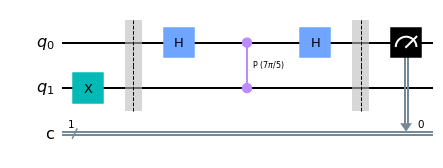

In [2]:
from math import pi, cos, sin
from qiskit import QuantumCircuit

theta = 0.7 # Can be changed to any value between 0 and 1

qc = QuantumCircuit(2, 1)

# Prepare eigenvector, which is the |1> state

qc.x(1)
qc.barrier()

# Implement the estimation procedure
qc.h(0)
qc.cp(2*pi*theta, 0, 1)
qc.h(0)
qc.barrier()

# Perform the final measurement
qc.measure(0, 0)

# Draw the circuit
qc.draw()

Now we'll run the circuit using the `Sampler` primitive.

In [3]:
from qiskit.primitives import Sampler
Sampler().run(qc).result()

SamplerResult(quasi_dists=[{0: 0.3454915028125262, 1: 0.6545084971874736}], metadata=[{}])

We can now compare the results to the predicted values to see that they're correct.

In [4]:
{   # Calculate predicted results
    0: cos(pi * theta) ** 2, 
    1: sin(pi * theta) ** 2
}

{0: 0.34549150281252616, 1: 0.6545084971874737}

<br>

*Doubling the phase*

The circuit described above uses the phase kickback phenomenon to approximate $\theta$ to a single bit of accuracy.
One bit of accuracy may be all we need in some situations — but for factoring we're going to need a lot more accuracy than that.
The natural question is, how can we learn more about $\theta?$

One simple thing we could do is to replace the controlled-$U$ operation in our circuit with *two copies* of this operation, like in this circuit:

![Single-bit phase estimation doubled](images/double-phase-kickback.png)

Two copies of a controlled-$U$ operation is equivalent to a controlled-$U^2$ operation.
If $\vert\psi\rangle$ is an eigenvector of $U$ having eigenvalue $\lambda = e^{2\pi i \theta},$ then this state is also an eigenvector of $U^2,$ this time having eigenvalue $\lambda^2 = e^{2\pi i (2\theta)}.$

So, if we run this version of the circuit, we're effectively performing the same computation as before, except that the number $\theta$ is replaced by $2\theta.$
The following plot illustrates the output probabilities as $\theta$ ranges from $0$ to $1.$

![Outcome probabilities from double-phase kickback](images/double-kickback-probabilities.png)

Doing this can indeed provide us with some additional information about $\theta.$
If the binary representation of $\theta$ is

$$
\theta = 0.a_1 a_2 a_3\cdots
$$

then doubling $\theta$ effectively shifts the binary point one position to the right:

$$
2\theta = a_1. a_2 a_3\cdots
$$

And because we're equating $\theta = 1$ with $\theta = 0$ as we move around the unit circle, we see that the bit $a_1$ has no influence on our probabilities — so we're effectively obtaining a guess for what we would get for the *second* bit after the binary point if we were to round $\theta$ to two bits.
For instance, if we knew in advance that $\theta$ was either $0$ or $1/4,$ then we could fully trust the measurement outcome to tell us which.

It's not immediately clear, though, how this estimation should be reconciled with what we learned from the original (non-doubled) phase kickback circuit to give us the most accurate information possible about $\theta.$
So let's take a step back and consider how to proceed.

*Two-qubit phase estimation*

Rather than considering the two options described above separately, let's combine them into a single circuit like this:

![The initial set-up for phase estimation with two qubits](images/two-bit-phase-estimation-initial.png)

The Hadamard gates after the controlled operations have been removed and there are no measurements here yet.
We'll add more to the circuit as we consider our options for learning as much as we can about $\theta.$

If we run this circuit for $\vert\psi\rangle$ being an eigenvector of $U,$ the state of the bottom qubits will remain $\vert\psi\rangle$ throughout the entire circuit — and phases will be "kicked" into the state of the top two qubits.
Let's analyze the circuit carefully, by means of the following figure.


![States for phase estimation with two qubits](images/two-bit-phase-estimation-states.png)

We can write the state $\vert\pi_1\rangle$ like this:

$$
\vert\pi_1\rangle = \vert \psi\rangle \otimes \frac{1}{2} \sum_{a_0 = 0}^1 \sum_{a_1 = 0}^1 \vert a_1 a_0 \rangle.
$$

When the first controlled-$U$ operation is performed, the eigenvalue $\lambda = e^{2\pi i\theta}$ gets kicked into the phase when $a_0$ (the top qubit) is equal to $1,$ but not when it's $0.$
So, we can express the resulting state like this:

$$
\vert\pi_2\rangle 
= \vert\psi\rangle \otimes \frac{1}{2} \sum_{a_0=0}^1 \sum_{a_1=0}^1 e^{2 \pi i a_0 \theta} \vert a_1 a_0 \rangle.
$$

The second and third controlled-$U$ gates do something similar, except for $a_1$ rather than $a_0,$ and with $\theta$ replaced by $2\theta.$
We can express the resulting state like this:

$$
\vert\pi_3\rangle
= \vert\psi\rangle\otimes\frac{1}{2}\sum_{a_0 = 0}^1 \sum_{a_1 = 0}^1 
e^{2\pi i (2 a_1 + a_0)\theta} \vert a_1 a_0 \rangle.
$$

If we think about the binary string $a_1 a_0$ as representing an integer $x \in \{0,1,2,3\}$ in binary notation, which is $x = 2 a_1 + a_0,$ we can alternatively express this state as follows:

$$
\vert\pi_3\rangle 
= \vert \psi\rangle \otimes \frac{1}{2} \sum_{x = 0}^3 e^{2\pi i x \theta} \vert x \rangle.
$$

Our goal is to extract as much information about $\theta$ as we can from this state.

At this point, we'll consider a special case, where we're promised that $\theta = \frac{y}{4}$ for some integer $y\in\{0,1,2,3\}.$ 
In other words, we have $\theta\in \{0, 1/4, 1/2, 3/4\},$ so we can express this number exactly using binary notation with two bits, as .$00,$ .$01,$ .$10,$ or .$11.$
In general, $\theta$ might not be one of these four values — but thinking about this special case will help us to figure out how to most effectively extract information about this value.

Let's define one two-qubit state vector for each possible value $y \in \{0, 1, 2, 3\}.$

$$
\vert \phi_y\rangle = \frac{1}{2} \sum_{x = 0}^3 e^{2\pi i x \bigl(\frac{y}{4}\bigr)} \vert x \rangle = \frac{1}{2} \sum_{x = 0}^3 e^{2\pi i \frac{x y}{4}} \vert x \rangle
$$

After simplifying the exponentials, we can write these vectors as follows:

$$
\begin{aligned}
\vert\phi_0\rangle & = \frac{1}{2} \vert 0 \rangle + \frac{1}{2} \vert 1 \rangle + \frac{1}{2} \vert 2 \rangle + \frac{1}{2} \vert 3 \rangle \\[2mm]
\vert\phi_1\rangle & = \frac{1}{2} \vert 0 \rangle + \frac{i}{2} \vert 1 \rangle - \frac{1}{2} \vert 2 \rangle - \frac{i}{2} \vert 3 \rangle \\[2mm]
\vert\phi_2\rangle & = \frac{1}{2} \vert 0 \rangle - \frac{1}{2} \vert 1 \rangle + \frac{1}{2} \vert 2 \rangle - \frac{1}{2} \vert 3 \rangle \\[2mm]
\vert\phi_3\rangle & = \frac{1}{2} \vert 0 \rangle - \frac{i}{2} \vert 1 \rangle - \frac{1}{2} \vert 2 \rangle + \frac{i}{2} \vert 3 \rangle
\end{aligned}
$$

These vectors are orthogonal: if we choose any pair of them and compute their inner product, we get $0.$
Each one is also a unit vector, so this implies that $\{\vert\phi_0\rangle, \vert\phi_1\rangle, \vert\phi_2\rangle, \vert\phi_3\rangle\}$ is an orthonormal basis.
So, we know right away that there is a measurement that can discriminate them perfectly — meaning that if we're given one of them but we don't know which, then we can figure out which one it is without error.

To perform such a discrimination with a quantum circuit, let's first define a unitary operation $V$ that transforms standard basis states into the four states listed above:

$$
\begin{aligned}
V \vert 00 \rangle & = \vert\phi_0\rangle \\
V \vert 01 \rangle & = \vert\phi_1\rangle \\
V \vert 10 \rangle & = \vert\phi_2\rangle \\
V \vert 11 \rangle & = \vert\phi_3\rangle \\
\end{aligned}
$$

To write down $V$ as a $4\times 4$ matrix, it's just a matter of taking the columns of $V$ to be the states $\vert\phi_0\rangle,\ldots,\vert\phi_3\rangle.$

$$
V =
\frac{1}{2}
\begin{pmatrix}
1 & 1 & 1 & 1\\
1 & i & -1 & -i\\
1 & -1 & 1 & -1\\
1 & -i & -1 & i
\end{pmatrix}
$$

We saw this matrix as an example at the end of Lesson 1.
It's a special matrix, and some readers will have seen it before:
it's the matrix associated with the $4$-dimensional *discrete Fourier transform*.

In light of this fact, let us call it by the name $\mathrm{QFT}_4$ rather than $V.$
The name $\mathrm{QFT}$ is short for *quantum Fourier transform* — which is essentially just the discrete Fourier transform, viewed as a quantum operation.
We'll discuss the quantum Fourier transform in greater detail and generality shortly.

$$
\mathrm{QFT}_4 =
\frac{1}{2}
\begin{pmatrix}
1 & 1 & 1 & 1\\
1 & i & -1 & -i\\
1 & -1 & 1 & -1\\
1 & -i & -1 & i
\end{pmatrix}
$$

So, the operation $\mathrm{QFT}_4$ maps standard basis states to the four possible states we have above.
We can perform this operation in reverse to go the other way, to transform the states $\vert\phi_0\rangle,\ldots,\vert\phi_3\rangle$ into the standard basis states $\vert 0\rangle,\ldots,\vert 3\rangle.$
If we do this, then we can measure to learn which value $y\in\{0,1,2,3\}$ describes $\theta$ as $\theta = y/4.$

Here's a diagram of the quantum circuit that does this.

![Phase estimation with two qubits](images/two-bit-phase-estimation.png)

To summarize, if we run this circuit when $\theta = y/4$ for $y\in\{0,1,2,3\},$ the state immediately before the measurements take place will be $\vert \psi\rangle \vert y\rangle$ (for $y$ encoded as a two-bit binary string), so the measurements will reveal the value $y$ without error.

This circuit is motivated by the special case that $\theta \in \{0,1/4,1/2,3/4\}$ — but we can run it for any choice of $U$ and $\vert \psi\rangle,$ and hence any value of $\theta,$ that we wish.
Here's a plot of the output probabilities the circuit produces for arbitrary choices of $\theta:$

![Outcome probabilities from two-qubit phase estimation](images/two-bit-probabilities.png)

This is a clear improvement over the single-qubit variant described earlier in the lesson.
It's not perfect — it can give us the wrong answer — but the answer is heavily skewed toward values of $y$ for which $y/4$ is close to $\theta.$
In particular, the most likely outcome always corresponds to the closest value of $y/4$ to $\theta$ (equating $\theta = 0$ and $\theta = 1$ as before), and it appears from the plot that this closest value for $x$ always appears with probability above $40\%.$
When $\theta$ is exactly halfway between two such values, like $\theta = 0.375$ for instance, the two equally close values of $y$ are equally likely.

*Qiskit implementation*

Here's an implementation of this procedure in Qiskit.
Similar to the previous implementation, we'll use a phase gate with a chosen angle $\theta$ for the unitary operation and $\vert 1\rangle$ for the eigenvector.

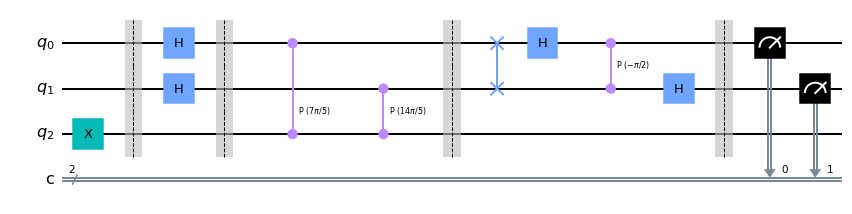

In [5]:
from math import pi
from qiskit import QuantumCircuit

theta = .7
qc = QuantumCircuit(3, 2)

# Prepare the eigenvector
qc.x(2)
qc.barrier()

# The initial Hadamard gates
qc.h(0)
qc.h(1)
qc.barrier()

# The controlled unitary gates
qc.cp(2*pi*theta,0,2)
qc.cp(2*pi*(2*theta),1,2)
qc.barrier()

# An implementation of the inverse of the two-qubit QFT
qc.swap(0,1)
qc.h(0)
qc.cp(-pi/2,0,1)
qc.h(1)
qc.barrier()

# And finally the measurements
qc.measure([0, 1], [0, 1])
qc.draw()


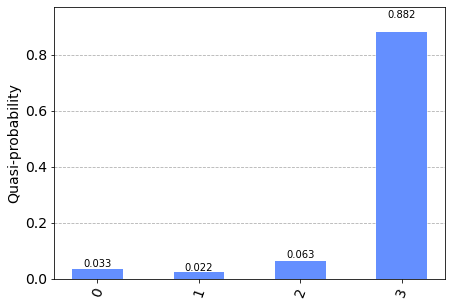

In [6]:
from qiskit.visualization import plot_histogram
result = Sampler().run(qc).result()
plot_histogram(result.quasi_dists)

<br>

*Generalizing to many qubits*

Given the improvement we've just obtained by using two control qubits rather than one, in conjunction with the $4$-dimensional quantum Fourier transform, it's natural to consider generalizing it further — by adding more control qubits.
When we do this, we obtain the general *phase estimation procedure*.
We'll see how this works shortly, but in order to describe it precisely we're going to need to discuss the quantum Fourier transform in greater generality, to see how it's defined for other dimensions and to see how we can implement it with a quantum circuit.

### Quantum Fourier transform

The quantum Fourier transform is a unitary operation that can be defined for any positive integer dimension $N.$
In this subsection we'll see how this operation is defined, and we'll see how it can be implemented with a quantum circuit on $m$ qubits with cost $O(m^2)$ when $N = 2^m.$

The matrices that describe this operation are derived from an analogous operation on $N$ dimensional vectors known as the *discrete Fourier transform*.
We can think about the discrete Fourier transform abstractly, in purely mathematical terms, but we can also think about it as a computational problem, where we're given an $N$ dimensional vector of complex numbers (using binary notation to encode the real and imaginary parts of the entries, let us suppose), and our goal is to calculate the result, which is again an $N$ dimensional vector.
An efficient algorithm for performing this computation known as the *fast Fourier transform* is considered by many to be one of the most important algorithms ever discovered — it's critical in signal processing and has wide-ranging applications.

Our focus, however, is on viewing this transform as a unitary operation that can be performed on a quantum system.

#### Definition of the quantum Fourier transform

To define the quantum Fourier transform, we'll first define a complex number $\omega_N,$ for each positive integer $N,$ like this:

$$
\omega_N = e^{\frac{2\pi i}{N}} = \cos\left(\frac{2\pi}{N}\right) + i \sin\left(\frac{2\pi}{N}\right).
$$

This is the number on the complex unit circle we obtain if we start at $1$ and move counter-clockwise by an angle of $2\pi/N$ — or "one click" if we imagine that $N$ discrete "clicks" would take us all the way around the circle.

Here are a few examples:

$$
\begin{gathered}
\omega_1 = 1\\[1mm]
\omega_2 = -1\\[1mm]
\omega_3 = -\frac{1}{2} + \frac{\sqrt{3}}{2} i\\[1mm]
\omega_4 = i\\[1mm]
\omega_8 = \frac{1+i}{\sqrt{2}}\\[1mm]
\omega_{16} = \frac{\sqrt{2 + \sqrt{2}}}{2} + \frac{\sqrt{2 - \sqrt{2}}}{2} i\\[1mm]
\omega_{100} \approx 0.998 + 0.063 i
\end{gathered}
$$


Now we can define the $N$-dimensional quantum Fourier transform, which is described by an $N\times N$ matrix whose rows and columns are associated with the standard basis states $\vert 0\rangle,\ldots,\vert N-1\rangle.$

$$
\mathrm{QFT}_N = \frac{1}{\sqrt{N}} \sum_{x = 0}^{N-1} \sum_{y = 0}^{N-1} \omega_N^{xy} \vert x \rangle\langle y\vert
$$

For phase estimation we're only going to need this operation for when $N = 2^m$ is a power of $2,$ but the operation can be defined for any positive integer $N.$

As was already stated, this is the matrix associated with the $N$-dimensional *discrete Fourier transform*.
(Often the leading factor of $1/\sqrt{N}$ is not included in the definition of the matrix associated with the discrete Fourier transform, but we need to include it to obtain a unitary matrix.
Sometimes a minus sign appears in the exponent of $\omega_N$ as well — different people define it in slightly different ways, but these differences are superficial and easily reconciled.)

Here's the quantum Fourier transform written as a matrix for some small values of $N.$

$$
\mathrm{QFT}_1 = \begin{pmatrix} 1 \end{pmatrix}
$$

$$
\mathrm{QFT}_2 = 
\frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1\\ 1 & -1 \end{pmatrix}
$$

$$
\mathrm{QFT}_3 = 
\frac{1}{\sqrt{3}} 
\begin{pmatrix} 
   1 & 1 & 1\\[2mm]
   1 & \frac{-1 + i\sqrt{3}}{2} & \frac{-1 - i\sqrt{3}}{2}\\[2mm]
   1 & \frac{-1 - i\sqrt{3}}{2} & \frac{-1 + i\sqrt{3}}{2}
\end{pmatrix}
$$

$$
\mathrm{QFT}_4 =
\frac{1}{2}
\begin{pmatrix}
1 & 1 & 1 & 1\\
1 & i & -1 & -i\\
1 & -1 & 1 & -1\\
1 & -i & -1 & i
\end{pmatrix}
$$

$$
\mathrm{QFT}_8 =
\frac{1}{2\sqrt{2}}
\begin{pmatrix}
  1 & 1 & 1 & 1 & 1 & 1 & 1 & 1\\[2mm]
  1 & \frac{1+i}{\sqrt{2}} & i & \frac{-1+i}{\sqrt{2}} & -1 & \frac{-1-i}{\sqrt{2}} & -i & \frac{1-i}{\sqrt{2}}\\[2mm]
  1 & i & -1 & -i & 1 & i & -1 & -i\\[2mm]
  1 & \frac{-1+i}{\sqrt{2}} & -i & \frac{1+i}{\sqrt{2}} & -1 & \frac{1-i}{\sqrt{2}} & i & \frac{-1-i}{\sqrt{2}}\\[2mm]
  1 & -1 & 1 & -1 & 1 & -1 & 1 & -1\\[2mm]
  1 & \frac{-1-i}{\sqrt{2}} & i & \frac{1-i}{\sqrt{2}} & -1 & \frac{1+i}{\sqrt{2}} & -i & \frac{-1+i}{\sqrt{2}}\\[2mm]
  1 & -i & -1 & i & 1 & -i & -1 & i\\[2mm]
  1 & \frac{1-i}{\sqrt{2}} & -i & \frac{-1-i}{\sqrt{2}} & -1 & \frac{-1+i}{\sqrt{2}} & i & \frac{1+i}{\sqrt{2}}\\[2mm]
\end{pmatrix}
$$

Notice, in particular, that $\mathrm{QFT}_2$ is another name for a Hadamard operation.

*Unitarity*

Let's check that $\mathrm{QFT}_N$ is indeed unitary, for any selection of $N.$
One way to do this is to show that the columns form an orthonormal basis.
We can define column number $y,$ starting from $y = 0$ and going up to $y = N-1,$ like this:

$$
\vert\phi_y\rangle = \frac{1}{\sqrt{N}} \sum_{x = 0}^{N-1} \omega_N^{xy} \vert x \rangle.
$$

Taking the inner product between any two columns gives us this expression:

$$
\langle \phi_z \vert \phi_y \rangle = \frac{1}{N} \sum_{x = 0}^{N-1} \omega_N^{x (y - z)}
$$

One way to evaluate sums like this is to use the following formula for the sum of the first $N$ terms of a geometric series.

$$
1 + \alpha + \alpha^2 + \cdots + \alpha^{N-1} =
\begin{cases}
\frac{\alpha^N - 1}{\alpha - 1} & \text{if } \alpha\not=1\\[2mm]
N & \text{if } \alpha=1
\end{cases}
$$

Specifically, we can use this formula when $\alpha = \omega_N^{y-z}.$
When $y = z,$ we have $\alpha = 1,$ so using the formula and dividing by $N$ gives

$$
\langle \phi_y \vert \phi_y \rangle = 1.
$$

When $y\neq z,$ we have $\alpha \neq 1,$ so using the formula reveals this:

$$
\langle \phi_z \vert \phi_y \rangle = \frac{1}{N} \frac{\omega_N^{N(y-z)} - 1}{\omega_N^{y-z} - 1} 
= \frac{1}{N} \frac{1 - 1}{\omega_N^{y-z} - 1} = 0.
$$

This happens because $\omega_N^N = e^{2\pi i} = 1,$ so $\omega_N^{N(y-z)} = 1^{y-z} = 1,$ and the numerator becomes $0$ (while the denominator is nonzero because $\omega_N^{y-z} \neq 1).$

At a more intuitive level, what we're effectively doing in the formula for $\langle \phi_z\vert\phi_y\rangle$ is summing a bunch of points that are evenly spread around the unit circle — so that they cancel each other out, leaving $0$ when we sum them.

So, we have established that $\{\vert\phi_0\rangle,\ldots,\vert\phi_{N-1}\rangle\}$ is an orthonormal set.

$$
\langle \phi_z \vert \phi_y \rangle =
\begin{cases}
0 & y=z\\
1 & y\not=z
\end{cases}
$$

This reveals that $\mathrm{QFT}_N$ is unitary.

*Controlled-phase gates*

In order to implement the quantum Fourier transform as a quantum circuit, we're going to need to make use of *controlled-phase* gates.

Recall from Lesson 1 that a *phase operation* is a single-qubit quantum operation of the form

$$
P_{\alpha} = 
\begin{pmatrix}
1 & 0\\
0 & e^{i\alpha}
\end{pmatrix}
$$

for any real number $\alpha.$
(In Lesson 1 we used the name $\theta$ in place of $\alpha,$ but in this lesson we'll reserve the letter $\theta$ for the parameter in phase estimation.)

A controlled version of this gate has the following matrix:

$$
CP_{\alpha} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\alpha}
\end{pmatrix}
$$

For this controlled gate, it doesn't actually matter which qubit is the control and which is the target — the two possibilities are equivalent.
We can use any of the following symbols to represent this gate in quantum circuit diagrams:

![Quantum circuit diagram representation for controlled-phase gates](images/controlled-phase-gates.png)

For the third form, the label $\alpha$ is also sometimes placed on the side of the control line or under the lower control when that's convenient.

Using controlled-phase gates we can perform the following transformation,
where $a$ is a bit and $y \in \{0,\ldots,2^{m-1} - 1\}$ is a number encoded in binary notation as a string of $m-1$ bits.

$$
\vert y \rangle \vert a \rangle \mapsto \omega_{2^m}^{ay} \vert y \rangle \vert a \rangle
$$

As an example, here's  for how this is done for $m=5.$

![Quantum circuit diagram for phase injection](images/phase-injection.png)

This can be naturally generalized for any $m$ — the phase gates always start from $\frac{\pi}{2}$ on the most significant bit of $x$ down to $\pi/2^{m-1}$ on the least significant bit.

*Circuit implementation of the QFT*

Now we'll see how we can implement the quantum Fourier transform with a circuit when the dimension $N = 2^m$ is a power of $2.$
There are, in fact, multiple ways to implement the quantum Fourier transform, but this is arguably the simplest method.

The implementation is recursive in nature, and so that's how it's most naturally described.
The base case is that the quantum Fourier transform on a single qubit is a Hadamard operation.

To perform the quantum Fourier transform on $m$ qubits when $m \geq 2,$ we can perform the following steps, whose actions we'll describe for standard basis states of the form $\vert x \rangle \vert a\rangle,$ where $x\in\{0,\ldots,2^{m-1} - 1\}$ is an integer encoded as $m-1$ bits using binary notation and $a$ is a single bit.

1. First apply the $2^{m-1}$-dimensional quantum Fourier transform to the bottom/leftmost $m-1$ qubits to obtain 
   this state:

   $$
   \Bigl(\mathrm{QFT}_{2^{m-1}} \vert x \rangle\Bigr) \vert a\rangle
   = \frac{1}{\sqrt{2^{m-1}}} \sum_{y = 0}^{2^{m-1} - 1} \omega_{2^{m-1}}^{xy} \vert y \rangle \vert a \rangle
   $$

   This is done by recursively applying the method being described for one fewer qubit, using the Hadamard 
   operation on a single qubit as the base case.

2. Use the top/rightmost qubit as a control to inject the phase $\omega_{2^m}^y$ for each standard basis 
   state $\vert y\rangle$ of the remaining $m-1$ qubits (as described above) to obtain this state:

   $$
   \frac{1}{\sqrt{2^{m-1}}} \sum_{y = 0}^{2^{m-1} - 1} \omega_{2^{m-1}}^{xy}
   \omega_{2^m}^{ay} \vert y \rangle \vert a \rangle
   $$
   
3. Perform a Hadamard gate on the top/rightmost qubit to obtain this state:

   $$
   \frac{1}{\sqrt{2^{m}}} \sum_{y = 0}^{2^{m-1} - 1} \sum_{b=0}^1 
   (-1)^{ab} \omega_{2^{m-1}}^{xy} \omega_{2^m}^{ay} 
   \vert y \rangle \vert b \rangle
   $$

4. Permute the order of the qubits so that the least significant bit becomes the most significant bit, with 
   all others shifted:

   $$
   \frac{1}{\sqrt{2^{m}}} \sum_{y = 0}^{2^{m-1} - 1} \sum_{b=0}^1 
   (-1)^{ab} \omega_{2^{m-1}}^{xy} \omega_{2^m}^{ay} 
   \vert b \rangle \vert y \rangle 
   $$

For example, here's the circuit we obtain for $N = 32 = 2^5.$
In this diagram, the qubits are given names that correspond to the standard basis vectors $\vert x\rangle \vert a\rangle$ (for the input) and $\vert b\rangle \vert y\rangle$ (for the output) for clarity.

![Quantum circuit diagram for the 32-dimensional quantum Fourier transform](images/QFT_32.png)

<br>

*Analysis*

The key formula we need to verify that the circuit just described implements the $2^m$-dimensional quantum Fourier transform is this one:

$$
(-1)^{ab}
\omega_{2^{m-1}}^{xy}
\omega_{2^m}^{ay}
=
\omega_{2^m}^{(2x+ a)(2^{m-1}b + y)}.
$$

This formula works for any choice of integers $a,$ $b,$ $x,$ and $y,$ but we'll only need it for
$a,b\in\{0,1\}$ and $x,y\in\{0,\ldots,2^{m-1}-1\}.$
We can check the formula by expanding the product in the exponent on the right-hand side,

$$
  \omega_{2^m}^{(2x+ a)(2^{m-1}b + y)}
  = \omega_{2^m}^{2^m xb} \omega_{2^m}^{2xy} \omega_{2^m}^{2^{m-1}ab} \omega_{2^m}^{ay}
  = (-1)^{ab} \omega_{2^{m-1}}^{xy} \omega_{2^m}^{ay},
$$

where the second equality makes use of the observation that

$$
\omega_{2^m}^{2^m xb} = \bigl(\omega_{2^m}^{2^m}\bigr)^{xb} = 1^{xb} = 1.
$$

Now, the $2^m$-dimensional quantum Fourier transform is defined as follows for every $u\in\{0,\ldots,2^m - 1\}.$

$$
\mathrm{QFT}_{2^m} \vert u\rangle = \frac{1}{\sqrt{2^m}}
\sum_{v = 0}^{2^m - 1} \omega_{2^m}^{uv} \vert v\rangle
$$

If we write $u$ and $v$ as

$$
\begin{aligned}
u & = 2x + a\\
v & = 2^{m-1}b + y
\end{aligned}
$$

for $a,b\in\{0,1\}$ and $x,y\in\{0,\ldots,2^{m-1} - 1\},$ we obtain

$$
\begin{aligned}
\mathrm{QFT}_{2^m} \vert 2x + a\rangle
& = 
\frac{1}{\sqrt{2^m}}
\sum_{y = 0}^{2^{m-1} - 1}
\sum_{b=0}^1 
\omega_{2^m}^{(2x+ a)(2^{m-1}b + y)} \vert b 2^{m-1} + y\rangle\\[2mm]
& =
\frac{1}{\sqrt{2^m}}
\sum_{y = 0}^{2^{m-1} - 1}
\sum_{b=0}^1 
(-1)^{ab}
\omega_{2^{m-1}}^{xy}
\omega_{2^m}^{ay}
\vert b 2^{m-1} + y\rangle.
\end{aligned}
$$

Finally, by thinking about the standard basis states $\vert x \rangle \vert a\rangle$ and $\vert b \rangle \vert y \rangle$ as binary encodings of integers in the range $\{0,\ldots,2^m-1\},$

$$
\begin{aligned}
\vert x \rangle \vert a\rangle & = \vert 2x + a \rangle\\
\vert b \rangle \vert y \rangle & = \vert 2^{m-1}b + y\rangle,
\end{aligned}
$$

we see that the circuit above implements the required operation.

If this method for performing the quantum Fourier transform seems remarkable, it's because it is.
It's essentially the same methodology that underlies the fast Fourier transform — one of the most important and useful classical algorithms ever discovered — in the form of a quantum circuit.

*Computational cost*

Now let's count how many gates are used in the circuit just described.
The controlled-phase gates aren't in the standard gate set that we discussed in the previous lesson, but to begin we'll ignore this and count each of them as a single gate.

Let's let $s_m$ denote the number of gates we need for each possible choice of $m.$
If $m=1,$ the quantum Fourier transform is just a Hadamard operation, so

$$
s_1 = 1.
$$

If $m\geq 2,$ then in the circuit above we need $s_{m-1}$ gates for the quantum Fourier transform on $m-1$ qubits, plus $m-1$ controlled-phase gates, plus a Hadamard gate, plus $m-1$ swap gates, so

$$
s_m = s_{m-1} + (2m - 1).
$$

We can obtain a closed-form expression by summing:

$$
s_m = \sum_{k = 1}^m (2k - 1) = m^2.
$$

We don't actually need as many swap gates as the method describes — if we rearrange the gates just a bit, we can push all of the swap gates out to the right and reduce the number of swap gates required to $\lfloor m/2\rfloor.$
Asymptotically speaking this isn't a major improvement: we still obtain circuits with size $O(m^2)$ for performing $\mathrm{QFT}_{2^m}.$

If we wish to implement the quantum Fourier transform using only gates from our standard gate set, we need to either build or approximate each of the controlled-phase gates with gates from our set.
The number required depends on how much accuracy we require, but the total number remains quadratic in the number $m.$
(We can even come up with a pretty good approximation to the quantum Fourier transform with a sub-quadratic number of gates by using the fact that when $\alpha$ is very small, we have $e^{i\alpha} \approx 1,$ so the controlled-phase gate $CP_{\alpha}$ can be very well approximated by doing nothing at all in such cases.)

*QFTs in Qiskit*

A circuit implementation of the QFT on any number of qubits can be obtained from Qiskit's circuit library.
(Note that for three or more qubits the circuit will differ slightly from the general description above because it incorporates some minor optimizations. In particular, the number of swap gates required can be reduced significantly by effectively pushing them to the end of the circuit and adjusting the controlled-phase gates accordingly.)

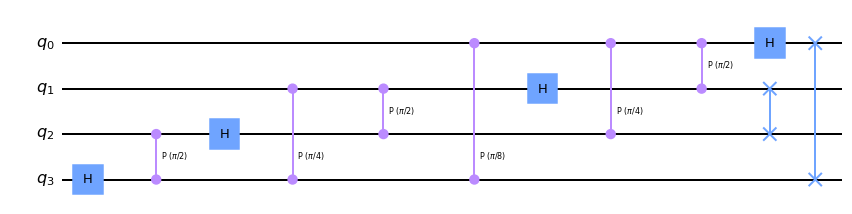

In [7]:
from qiskit.circuit.library import QFT
QFT(4).decompose().draw()

### General procedure and analysis

Now we'll examine the phase-estimation procedure in general.
The idea is to extend the single- and double-qubit versions of phase estimation that we considered above in the natural way, as suggested by the following diagram.

![Phase estimation procedure](images/phase-estimation-procedure.png)

Notice that for each new control qubit added on the top, we *double* the number of times the unitary operation $U$ is performed.
Rather than drawing however many copies of the controlled-$U$ operation are needed to do this in the diagram, we've instead raised $U$ to the required powers.

In general, adding additional control qubits on the top like this will contribute significantly to the size of the circuit: if we have $m$ control qubits, like the diagram depicts, a total of $2^m - 1$ copies of the controlled-$U$ operation are required.
This means that a **significant computational cost** is incurred as $m$ is increased — but as we will see, it also leads to a significantly more accurate approximation of $\theta.$

It is important to note, however, that for *some* choices of $U$ it may be possible to create a circuit that implements the operation $U^k$ for large values of $k$ in a more efficient way than simply repeating $k$ times the circuit for $U.$
We'll see a specific example of this in the context of integer factorization later in the lesson, where the efficient algorithm for *modular exponentiation* discussed in the previous lesson comes to the rescue.

Now let us analyze the circuit just described.
The state immediately prior to the quantum Fourier transform looks like this:

$$
\frac{1}{\sqrt{2^m}} \sum_{x = 0}^{2^m - 1} \bigl( U^x \vert\psi\rangle \bigr) \vert x\rangle
= \vert\psi\rangle \otimes \frac{1}{\sqrt{2^m}} \sum_{x = 0}^{2^m - 1} e^{2\pi i x\theta}  \vert x\rangle.
$$

*A special case*

Along similar lines to what we did in the $m=2$ case above, we can consider the special case that
$\theta = y/2^m$ for $y\in\{0,\ldots,2^m-1\},$ and we see that this state can alternatively be written like this:

$$
\vert\psi\rangle \otimes \frac{1}{\sqrt{2^m}} \sum_{x = 0}^{2^m - 1} e^{2\pi i \frac{xy}{2^m}}  \vert x\rangle
= \vert\psi\rangle \otimes \frac{1}{\sqrt{2^m}} \sum_{x = 0}^{2^m - 1} \omega_{2^m}^{xy}  \vert x\rangle
= \vert\psi\rangle \otimes \mathrm{QFT}_{2^m} \vert y\rangle.
$$

So, when the inverse of the quantum Fourier transform is applied, the state becomes

$$
\vert\psi\rangle \vert y\rangle
$$

and the measurements reveal $y$ (encoded in binary).


*Bounding the probabilities*

For other values of $\theta,$ meaning ones that don't take the form $y/2^m$ for an integer $y,$ the measurement outcomes won't be certain, but we can prove certain bounds on the probabilities for different outcomes.
Going forward, let's consider an arbitrary choice of $\theta$ satisfying $0\leq \theta < 1.$

After the quantum Fourier transform is performed, the state of the circuit is this:

$$
\vert \psi \rangle \otimes 
\frac{1}{2^m} \sum_{y=0}^{2^m - 1} \sum_{x=0}^{2^m-1} e^{2\pi i x (\theta - y/2^m)} \vert y\rangle.
$$

So, when the measurements on the top $m$ qubits are performed, we see each outcome $y$ with probability

$$
p_y = 
\left\vert 
\frac{1}{2^m} \sum_{x=0}^{2^m - 1} e^{2\pi i x (\theta - y/2^m)} \right|^2
$$

To get a better handle on these probabilities, we'll make use of the same formula that we saw before, for the sum of the initial portion of a geometric series.

$$
1 + \alpha + \alpha^2 + \cdots + \alpha^{N-1} =
\begin{cases}
\frac{\alpha^N - 1}{\alpha - 1} & \text{if } \alpha\not=1\\[2mm]
N & \text{if } \alpha=1
\end{cases}
$$

We can simplify the sum appearing in the formula for $p_y$ by taking $\alpha = e^{2\pi i (\theta - y/2^m)}.$
Here's what we obtain.

$$
\sum_{x=0}^{2^m - 1} e^{2\pi i x (\theta - y/2^m)}
=
\begin{cases}
2^m & \theta = y/2^m\\[2mm]
\frac{e^{2\pi (2^m \theta - y)} - 1}{e^{2\pi (\theta - y/2^m)} - 1}
& \theta\neq y/2^m
\end{cases}
$$

So, in the case that $\theta = y/2^m,$ we find that $p_y = 1$ (as we already knew from considering this special case),
and in the case that $\theta \neq y/2^m,$ we find that

$$
p_y = \frac{1}{2^{2m}} \left\vert \frac{e^{2\pi i (2^m \theta - y)} - 1}{e^{2\pi i (\theta - y/2^m)} - 1}\right\vert^2.
$$

We can learn more about these probabilities by thinking about how arc length and chord length on the unit circle are related.
Here's a figure that illustrates the relationships we need for any real number $\delta\in \bigl[ -\frac{1}{2},\frac{1}{2}\bigr].$

![Illustration of the relationship between arc and chord lengths](images/arc-and-chord.png)


First, the chord length (drawn in blue) can't possibly be larger than the arc length (drawn in purple):

$$
\bigl\vert e^{2\pi i \delta} - 1\bigr\vert \leq 2\pi\vert\delta\vert.
$$

Relating these lengths in the other direction, we see that the ratio of the arc length to the chord length is greatest when $\delta = \pm 1/2,$ and in this case the ratio is half the circumference of the circle divided by the diameter, which is $\pi/2.$
Thus, we can write

$$
4\vert\delta\vert \leq
\bigl\vert e^{2\pi i \delta} - 1\bigr\vert.
$$

An analysis based on this relation reveals the following two facts.

1. Suppose that $\theta$ is a real number and $y\in \{0,\ldots,2^m-1\}$ satisfies
   
   $$
   \Bigl\vert \theta - \frac{y}{2^m}\Bigr\vert \leq 2^{-(m+1)}.
   $$
   
   This means that $y/2^m$ is either the best $m$-bit approximation to $\theta,$ or it's one of the two best approximations in case $\theta$ is exactly halfway between $y/2^m$ and either $(y-1)/2^m$ or $(y+1)/2^m.$

   We'll prove that $p_y$ has to be pretty large in this case.
   By the assumption we're considering, it follows that $\vert 2^m \theta - y \vert \leq 1/2,$ so we can use the second observation above relating arc and chord lengths to conclude that
   
   $$
   \left\vert e^{2\pi (2^m \theta - y)} - 1\right\vert 
   \geq 4 \vert 2^m \theta - y \vert = 4 \cdot 2^m \cdot \Bigl\vert \theta - \frac{y}{2^m}\Bigr\vert.
   $$
  
   We can also use the first observation about arc and chord lengths to conclude that
   
   $$
   \left\vert e^{2\pi (\theta - y/2^m)} - 1\right\vert \leq 2\pi \Bigl\vert \theta - \frac{y}{2^m}\Bigr\vert.
   $$
   
   Putting these two inequalities to use on $p_y$ reveals
   
   $$
   p_y \geq \frac{1}{2^{2m}} \frac{16 \cdot 2^{2m}}{4 \pi^2} = \frac{4}{\pi^2} \approx 0.405.
   $$
   
   (So, our observation that the best outcome occurs with probability greater than $40\%$ in the $m=2$ version of phase estimation discussed earlier in fact holds for every choice of $m.$)

2. Now suppose that $y\in \{0,\ldots,2^m-1\}$ satisfies

   $$
   2^{-m} \leq \Bigl\vert \theta - \frac{y}{2^m}\Bigr\vert \leq \frac{1}{2}.
   $$

   This means that there's a better approximation $z/2^m$ to $\theta$ in between $\theta$ and $y/2^m.$
      
   This time we'll prove that $p_y$ can't be too big.
   We can start with the simple observation that
   
   $$
   \left\vert e^{2\pi (2^m \theta - y)} - 1\right\vert \leq 2,
   $$
   
   which follows from the fact that any two points on the unit circle can differ in absolute value by at most $2.$
   
   We can also use the second observation about arc and chord lengths from above, this time working with the denominator of $p_y$ rather than the numerator, to conclude
   
   $$
   \left\vert e^{2\pi (\theta - y/2^m)} - 1\right\vert \geq  4\Bigl\vert \theta - \frac{y}{2^m}\Bigr\vert
   \geq 4 \cdot 2^{-m}.
   $$
   
   Putting the two inequalities together reveals
   
   $$
   p_y \leq \frac{1}{2^{2m}} \frac{4}{16 \cdot 2^{-2m}} = \frac{1}{4}.
   $$


This is quite good, in the sense that very close approximations to $\theta$ are likely to occur, with probability greater than $40\%,$ whereas approximations off by more than $2^{-m}$ are less likely, with probability at most $25\%.$

We may, however, wish to boost our confidence.
One way to do this is to repeat the phase estimation procedure several times to gather statistical evidence about $\theta.$
Notice that the state $\vert\psi\rangle$ of the bottom collection of qubits is unchanged by the phase estimation procedure, so it can be used to run the procedure as many times as we like.

Each time we rum the circuit, we get a best $m$-bit approximation to $\theta$ with probability greater than $40\%,$ while the probability of being off by more than $2^{-m}$ is bounded by $25\%.$
So, if we run the circuit several times and take the most commonly appearing outcome of the runs, it's exceedingly likely that the outcome that appears most commonly will **not** be one that occurs at most $25\%$ of the time.
As a result, we'll be very likely to obtain an approximation $y/2^m$ that's within $1/2^m$ of the value $\theta,$ and indeed the unlikely chance that we're off by more than $1/2^m$ decreases exponentially in the number of times the procedure is run.

*Qiskit implementation*

Here's an implementation of phase estimation in Qiskit.
Try adjusting $\theta$ and the number of control qubits $m$ to see how the results change.

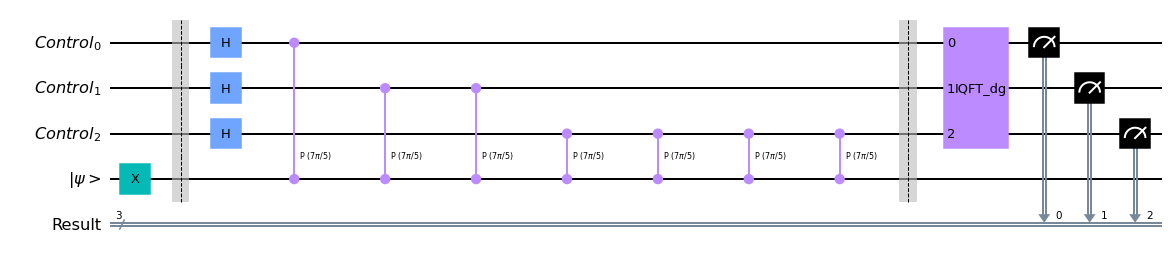

In [8]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

theta = .7
m = 3 # Number of control qubits

control_register = QuantumRegister(m, name="Control")
target_register = QuantumRegister(1, name="|ψ>")
output_register = ClassicalRegister(m, name="Result")
qc = QuantumCircuit(control_register, target_register, output_register)

# Prepare the eigenvector |ψ>
qc.x(target_register)
qc.barrier()

# Perform phase estimation
for index, qubit in enumerate(control_register):
    qc.h(qubit)
    for _ in range(2**index):
        qc.cp(2*pi*theta, qubit, target_register)
qc.barrier()

# Do inverse quantum Fourier transform
qc.compose(
    QFT(m, inverse=True),
    inplace=True
)

# Measure everything
qc.measure(range(m), range(m))
qc.draw()

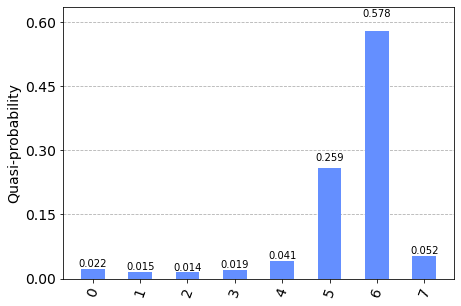

In [9]:
result = Sampler().run(qc).result()
plot_histogram(result.quasi_dists)

In [10]:
most_probable = max(result.quasi_dists[0],
                    key=result.quasi_dists[0].get)

print(f"Most probable output: {most_probable}")
print(f"Estimated theta: {most_probable/2**m}")

Most probable output: 6
Estimated theta: 0.75


## Shor's algorithm

Now we'll turn our attention to the integer factorization problem, and see how it can be solved efficiently on a quantum computer using phase estimation.
The algorithm we'll obtain is *Shor's algorithm for integer factorization*.
Shor didn't describe his algorithm specifically in terms of phase estimation, but it is a natural and intuitive way to explain how it works.

In the two subsections that follow we'll describe the two main parts of Shor's algorithm.
In the first subsection we'll define an intermediate problem known as the *order-finding problem* and see how phase estimation provides a solution to this problem.
In the second subsection we'll explain how an efficient solution to the order-finding problem also gives us an efficient solution to the integer factorization problem.
(When a solution to one problem provides a solution to another problem like this, we say that the second problem *reduces* to the first — so in this case we're reducing integer factorization to order finding.)
This part of Shor's algorithm doesn't make use of quantum computing at all — it's completely classical.

### Order finding

*Some basic number theory*

To explain the order-finding problem and how it can be solved using phase estimation, it will be very helpful to explain a couple of basic concepts in number theory and introduce some handy notation along the way.

To begin, for any given positive integer $N,$ we'll define a set

$$
\mathbb{Z}_N = \{0,1,\ldots,N-1\}.
$$

For instance,
$\mathbb{Z}_1 = \{0\},\;$
$\mathbb{Z}_2 = \{0,1\},\;$
$\mathbb{Z}_3 = \{0,1,2\},\;$
and so on.

These are sets of numbers, but we can think of them as more than sets.
In particular, we can think about *arithmetic operations* on $\mathbb{Z}_N$ such as addition and multiplication — and if we agree to always take our answers modulo $N,$ we'll always stay within this set when we perform these operations.
(The two specific operations of addition and multiplication, both taken modulo $N,$ turn $\mathbb{Z}_N$ into a *ring*, which is a fundamentally important type of object in algebra.)

For example, $3$ and $5$ are elements of $\mathbb{Z}_7,$ and if we multiply them together we get $3\cdot 5 = 15,$ which leaves a remainder of $1$ when divided by $7.$
Sometimes we express this as follows.

$$
3 \cdot 5 \equiv 1 \; (\textrm{mod } 7)
$$

But we can also simply write $3 \cdot 5 = 1,$ provided that it's been made clear that we're working in $\mathbb{Z}_7,$ just to keep our notation as simple and clear as possible.

As an example, here are the addition and multiplication tables for $\mathbb{Z}_6.$

$$
\begin{array}{c|cccccc}
    + & 0 & 1 & 2 & 3 & 4 & 5 \\\hline
    0 & 0 & 1 & 2 & 3 & 4 & 5 \\
    1 & 1 & 2 & 3 & 4 & 5 & 0 \\
    2 & 2 & 3 & 4 & 5 & 0 & 1 \\
    3 & 4 & 5 & 0 & 1 & 2 & 3 \\
    4 & 5 & 0 & 1 & 2 & 3 & 4 \\
    5 & 0 & 1 & 2 & 3 & 4 & 5 \\
\end{array}
\qquad
\begin{array}{c|cccccc}
\cdot & 0 & 1 & 2 & 3 & 4 & 5 \\\hline
    0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 0 & 1 & 2 & 3 & 4 & 5 \\
    2 & 0 & 2 & 4 & 0 & 2 & 4 \\
    3 & 0 & 3 & 0 & 3 & 0 & 3 \\
    4 & 0 & 4 & 2 & 0 & 4 & 2 \\
    5 & 0 & 5 & 4 & 3 & 2 & 1 \\
\end{array}
$$

Among the $N$ elements of $\mathbb{Z}_N,$ the elements $a\in\mathbb{Z}_N$ that satisfy $\gcd(a,N) = 1$ are special.
Frequently the set containing these elements is denoted with a star like this:

$$
\mathbb{Z}_N^{\ast} = \{a\in \mathbb{Z}_N : \gcd(a,N) = 1\}.
$$

If we focus our attention on the operation of multiplication, the set $\mathbb{Z}_N^{\ast}$ forms a *group* — and specifically an *abelian group* — which is another important type of object in algebra.
It's a basic fact about these sets (and indeed about finite groups in general), that if we pick any element $a\in\mathbb{Z}_N^{\ast}$ and repeatedly multiply $a$ to itself, we'll always eventually get the number $1.$

For a first example, let's take $N=6.$
We have that $5\in\mathbb{Z}_6^{\ast}$ because $\gcd(5,6) = 1,$ and if we multiply $5$ to itself we get $1$
(as the table above confirms).

$$
5^2 = 1 \quad \text{(working within $\mathbb{Z}_6$)}
$$

As a second example, let's take $N = 21.$
If we go through the numbers from $0$ to $20,$ these are the ones that have GCD equal to $1$ with $21:$

$$
\mathbb{Z}_{21}^{\ast} = \{1,2,4,5,8,10,11,13,16,17,19,20\}.
$$

For each of these elements, it is possible to raise that number to a positive integer power to get $1.$
Here are the smallest powers for which this works:

$$
\begin{aligned}
1^{1} = 1\\
2^{6} = 1\\
4^{3} = 1\\
5^{6} = 1\\
8^{2} = 1\\
10^{6} = 1\\
11^{6} = 1\\
13^{2} = 1\\
16^{3} = 1\\
17^{6} = 1\\
19^{6} = 1\\
20^{2} = 1\\
\end{aligned}
$$

Naturally we're working within $\mathbb{Z}_{21}$ for all of these equations, which we haven't bothered to write — we take it to be implicit to avoid cluttering things up. We'll continue to do that throughout the rest of the lesson.

You can check each of these equations above, as well as the fact that these are the smallest positive integer powers for which the equations work, using the following code cell (changing the numbers as needed).

In [11]:
N = 21
a = 17
max_power = 12

print("k \t a^k \n")
for k in range(1,max_power+1):
    print("%2d \t %2d" %(k, a**k % N))     # The % operation computes the remainder modulo N

k 	 a^k 

 1 	 17
 2 	 16
 3 	 20
 4 	  4
 5 	  5
 6 	  1
 7 	 17
 8 	 16
 9 	 20
10 	  4
11 	  5
12 	  1


Notice that after we get back to $1,$ the cycle repeats — which makes sense because multiplying $1$ by $a$ brings us back to $a,$ which is where we started.

Although it isn't essential for the sake of the lesson, we can also check that we never get back to $1$ when $\gcd(a,N)\neq 1$ — so we're relying on the fact that $a\in\mathbb{Z}_N^{\ast}$ for this to work.

In [12]:
N = 21
a = 18
max_power = 12

print("k \t a^k \n")
for k in range(1,max_power+1):
    print("%2d \t %2d" %(k, a**k % N))
    

k 	 a^k 

 1 	 18
 2 	  9
 3 	 15
 4 	 18
 5 	  9
 6 	 15
 7 	 18
 8 	  9
 9 	 15
10 	 18
11 	  9
12 	 15


<br>

*Problem statement*

Now we can state the order-finding problem.

> **Order finding**\
> Input: positive integers $N$ and $a$ satisfying $\gcd(N,a) = 1$\
> Output: the smallest positive integer $r$ such that $a^r \equiv 1$ $(\textrm{mod } N)$

Alternatively, in terms of the notation we just introduced above, we're given $a \in \mathbb{Z}_N^{\ast},$ and we're looking for the smallest positive integer $r$ such that $a^r = 1.$
This number $r$ is called the *order* of $a$ modulo $N.$

*Multiplication by an element in* $\mathbb{Z}_N^{\ast}$

To connect the order-finding problem to phase estimation, let's think about the operation defined on a system whose classical states correspond to $\mathbb{Z}_N,$ where we multiply by a fixed element $a\in\mathbb{Z}_N^{\ast}.$

$$
M_a \vert x\rangle = \vert ax \rangle \qquad \text{(for each $x\in\mathbb{Z}_N$)}
$$

To be clear, we're doing the multiplication in $\mathbb{Z}_N,$ so it's implicit that we're taking the remainder modulo $N$ inside of the ket on the right-hand side of the equation.

For example, if $N = 15$ and $a=2,$ we have

$$
\begin{aligned}
M_{2} \vert 0 \rangle & = \vert 0\rangle \\[1mm]
M_{2} \vert 1 \rangle & = \vert 2\rangle \\[1mm]
M_{2} \vert 2 \rangle & = \vert 4\rangle \\[1mm]
M_{2} \vert 3 \rangle & = \vert 6\rangle \\[1mm]
M_{2} \vert 4 \rangle & = \vert 8\rangle \\[1mm]
M_{2} \vert 5 \rangle & = \vert 10\rangle \\[1mm]
M_{2} \vert 6 \rangle & = \vert 12\rangle \\[1mm]
M_{2} \vert 7 \rangle & = \vert 14\rangle \\[1mm]
M_{2} \vert 8 \rangle & = \vert 1\rangle \\[1mm]
M_{2} \vert 9 \rangle & = \vert 3\rangle \\[1mm]
M_{2} \vert 10 \rangle & = \vert 5\rangle \\[1mm]
M_{2} \vert 11 \rangle & = \vert 7\rangle \\[1mm]
M_{2} \vert 12 \rangle & = \vert 9\rangle \\[1mm]
M_{2} \vert 13 \rangle & = \vert 11\rangle \\[1mm]
M_{2} \vert 14 \rangle & = \vert 13\rangle
\end{aligned}
$$

So long as $\gcd(a,N)=1,$ this is a unitary operation.
It shuffles the elements of the standard basis
$\{\vert 0\rangle,\ldots,\vert N-1\rangle\},$ so as a matrix it's a *permutation matrix*.
It's evident from its definition that this operation is deterministic, and a simple way to see that it's invertible is to think about the order $r$ of $a$ modulo $N,$ and to recognize that the inverse of $M_a$ is $M_a^{r-1}.$

$$
M_a^{r-1} M_a = M_a^r = M_{a^r} = M_1 = \I
$$

There's another way to think about the inverse that doesn't require any knowledge of $r$ — which, after all, is what we're trying to compute.
For every element $a\in\mathbb{Z}_N^{\ast}$ there's always a unique element $b\in\mathbb{Z}_N^{\ast}$ that satisfies $ab=1.$ 
We denote this element $b$ by $a^{-1},$ and it can be computed efficiently.
(An extension of Euclid's GCD algorithm does it at cost quadratic in $\operatorname{lg}(N).$)
And thus

$$
M_{a^{-1}} M_a = M_{a^{-1}a} = M_1 = \I.
$$

So, the operation $M_a$ is both deterministic and invertible.
That implies that it's described by a permutation matrix, and it's therefore unitary.

*Eigenvectors and eigenvalues of multiplication operations*

Now let's think about the eigenvectors and eigenvalues of the operation $M_a,$ assuming that $a\in\mathbb{Z}_N^{\ast}.$ 
As was just argued, this assumption tells us that $M_a$ is unitary.

There are $N$ eigenvalues of $M_a,$ possibly including the same eigenvalue repeated multiple times, and in general there's some freedom in selecting corresponding eigenvectors — but we won't need to worry about all of the possibilities.
Let's start simple and identify just one eigenvector of $M_a.$

$$
\vert \psi_0 \rangle = \frac{\vert 1 \rangle + \vert a \rangle + \cdots + \vert a^{r-1} \rangle}{\sqrt{r}}
$$

The number $r$ is the order of $a$ modulo $N$ — here and throughout the remainder of the lesson.
The eigenvalue associated with this eigenvector is $1$ because it isn't changed when we multiply by $a.$

$$
M_a \vert \psi_0 \rangle 
= \frac{\vert a \rangle + \cdots + \vert a^{r-1} \rangle + \vert a^r \rangle}{\sqrt{r}}
= \frac{\vert a \rangle + \cdots + \vert a^{r-1} \rangle + \vert 1 \rangle}{\sqrt{r}}
= \vert \psi_0 \rangle
$$

This happens because $a^r = 1,$ so each standard basis state $\vert a^k \rangle$ gets shifted to $\vert a^{k+1} \rangle$ for $k\leq r-1,$ and $\vert a^{r-1} \rangle$ gets shifted back to $\vert 1\rangle.$
Informally speaking, it's like we're slowly stirring $\vert \psi_0 \rangle,$ but it's already completely stirred so nothing changes.

Here's another example of an eigenvector of $M_a.$
This one happens to be more interesting in the context of order finding and phase estimation.

$$
\vert \psi_1 \rangle = \frac{\vert 1 \rangle + \omega_r^{-1} \vert a \rangle + \cdots + \omega_r^{r-1}\vert a^{r-1} \rangle}{\sqrt{r}}
$$

Alternatively, we can write this vector using a summation as follows.

$$
\vert \psi_1 \rangle = \frac{1}{\sqrt{r}}
\sum_{k = 0}^{r-1} \omega_r^{-k} \vert a^k \rangle 
$$

Here we see the complex number $\omega_r = e^{2\pi i/r}$ showing up naturally, due to the underlying structure of multiplication by $a$ modulo $N.$
This time the corresponding eigenvalue is $\omega_r.$
To see this, we can first compute like this:

$$
M_a \vert \psi_1 \rangle 
= \sum_{k = 0}^{r-1} \omega_r^{-k} M_a\vert a^k \rangle 
= \sum_{k = 0}^{r-1} \omega_r^{-k} \vert a^{k+1} \rangle 
= \sum_{k = 1}^{r} \omega_r^{-(k - 1)} \vert a^{k} \rangle 
= \omega_r \sum_{k = 1}^{r} \omega_r^{-k} \vert a^{k} \rangle.
$$

Then, because $\omega_r^{-r} = 1 = \omega_r^0$ and $\vert a^r \rangle = \vert 1\rangle = \vert a^0\rangle,$ we see that

$$
\sum_{k = 1}^{r} \omega_r^{-k} \vert a^{k} \rangle = \sum_{k = 0}^{r-1} \omega_r^{-k} \vert a^k \rangle
= \vert\psi_1\rangle,
$$

so $M_a \vert\psi_1\rangle = \omega_r \vert\psi_1\rangle.$

Using the same reasoning, we can identify additional eigenvector/eigenvalue pairs for $M_a.$
Indeed, for any choice of $j\in\{0,\ldots,r-1\}$ we have that

$$
\vert \psi_j \rangle = \frac{1}{\sqrt{r}}
\sum_{k = 0}^{r-1} \omega_r^{-jk} \vert a^k \rangle 
$$

is an eigenvector of $M_a$ whose corresponding eigenvalue is $\omega_r^j.$

$$
M_a \vert \psi_j \rangle = \omega_r^j \vert \psi_j \rangle
$$

There are other eigenvectors, such as $\vert 0 \rangle,$ which has eigenvalue $1,$ but we'll only be concerned with the eigenvectors $\vert\psi_0\rangle,\ldots,\vert\psi_{r-1}\rangle$ that we've just identified.

*Applying phase estimation*

To solve the order-finding problem for a given choice of $a\in\mathbb{Z}_N^{\ast},$ we can apply the phase-estimation procedure to the operation $M_a.$

To do this, we need to implement not only $M_a$ efficiently with a quantum circuit, but also $M_a^2,$ $M_a^4,$ $M_a^8,$ and so on, going as far as needed to obtain a precise enough estimate from the phase estimation procedure.
Here we'll explain how this can be done, and we'll figure out exactly how much precision is needed a bit later.

Let's start with the operation $M_a$ by itself.
Naturally, because we're working with the quantum circuit model, we'll use binary notation to encode the numbers between $0$ and $N-1.$
The largest number we need to encode is $N-1,$ so the number of bits we need is

$$
n = \operatorname{lg}(N-1) = \lfloor \log(N-1) \rfloor + 1.
$$

For example, if $N = 21$ we have $n = \operatorname{lg}(N-1) = 5.$
Here's what the encoding of elements of $\mathbb{Z}_{20}$ as binary strings of length $5$ looks like.

$$
\begin{gathered}
0  \mapsto 00000\\[1mm]
1  \mapsto 00001\\[1mm]
\vdots\\[1mm]
20 \mapsto 10100
\end{gathered}
$$

And now, here's a precise definition of how $M_a$ is defined as an $n$-qubit operation.

$$
M_a \vert x\rangle = 
\begin{cases}
\vert ax \; (\textrm{mod}\;N)\rangle & 0\leq x < N\\[1mm]
\vert x\rangle & N\leq x < 2^n
\end{cases}
$$

The point is that although we only care about how $M_a$ works for $\vert 0\rangle,\ldots,\vert N-1\rangle,$ we do have to specify how it works for the remaining $2^n - N$ standard basis states — and we need to do this in a way that still gives us a unitary operation.
Defining $M_a$ so that it does nothing to the remaining standard basis states accomplishes this.

Using the algorithms for integer multiplication and division discussed in the previous lesson, together with the methodology for reversible, garbage-free implementations of them, we can build a quantum circuit that performs $M_a,$ for any choice of $a\in\mathbb{Z}_N^{\ast},$ at cost $O(n^2).$
Here's one way that this can be done.

1. We build a circuit for performing the operation

   $$
   \vert x \rangle \vert y \rangle \mapsto \vert x \rangle \vert y \oplus f_a(x)\rangle
   $$

   where

   $$
   f_a(x) = 
   \begin{cases}
   ax \; (\textrm{mod}\;N) & 0\leq x < N\\[1mm]
   x & N\leq x < 2^n
   \end{cases}
   $$

   using the method described in the previous lesson.
   This gives us a circuit of size $O(n^2).$

2. We swap the two $n$-qubit systems using $n$ swap gates to swap the qubits individually.

3. Along similar lines to the first step, we can build a circuit for the operation

   $$
   \vert x \rangle \vert y \rangle \mapsto \vert x \rangle \bigl\vert y \oplus f_{a^{-1}}(x)\bigr\rangle
   $$

   where $a^{-1}$ is the inverse of $a$ in $\mathbb{Z}_N^{\ast}.$

By initializing the bottom $n$ qubits and composing the three steps, we obtain this transformation:

$$
\vert x \rangle \vert 0^n \rangle 
\stackrel{\text{step 1}}{\mapsto} 
\vert x \rangle \vert f_a(x)\rangle
\stackrel{\text{step 2}}{\mapsto}
\vert f_a(x)\rangle \vert x \rangle
\stackrel{\text{step 3}}{\mapsto}
\vert f_a(x)\rangle \bigl\vert x \oplus f_{a^{-1}}(f_a(x)) \bigr\rangle
= \vert f_a(x)\rangle\vert 0^n \rangle 
$$

The total cost of the circuit we obtain is $O(n^2).$

To perform $M_a^2,$ $M_a^4,$ $M_a^8,$ and so on, we can use exactly the same method, except that we replace $a$ with $a^2,$ $a^4,$ $a^8,$ and so on, as elements of $\mathbb{Z}_N^{\ast}.$
That is, for any power $k$ we choose, we can create a circuit for $M_a^k$ not by iterating $k$ times the circuit for $M_a,$ but instead by computing $b = a^k \in \mathbb{Z}_N^{\ast}$ and then using the circuit for $M_b.$

The computation of powers $a^k \in \mathbb{Z}_N$ is the *modular exponentiation* problem mentioned in the previous lesson.
This computation can be done *classically*, using the algorithm for modular exponentiation mentioned in the previous lesson (often called the *power algorithm* in computational number theory).
This time we don't need to implement this algorithm reversibly with a quantum circuit, we just need to do it classically.

And we're fortunate that this is possible.
We're effectively offloading the problem of iterating $M_a$ a huge number of times, which can be exponential in the number $m$ we choose in phase estimation, to an efficient classical computation.
In terms of the quantum circuit we're running, the cost of $M_a$ iterated $k$ times is simply the cost of $M_b,$ for $b = a^k$ — and so the cost is $O(n^2).$

For an arbitrary choice of a quantum circuit in the phase estimation problem this won't be possible, resulting in a cost for phase estimation that's *exponential* in the number $m$ we use in phase estimation. 
By the power of computational number theory, the cost in the case at hand is *linear* in $m.$

*A convenient eigenvector/eigenvalue pair*

To understand how we can solve the order-finding problem using phase estimation, let's start by supposing that
we run the phase estimation procedure on the operation $M_a$ using the eigenvector $\vert\psi_1\rangle.$
Getting our hands on this eigenvector isn't easy, as it turns out, so this won't be the end of the story — but it's helpful to start here.

The eigenvalue of $M_a$ corresponding to the eigenvector $\vert \psi_1\rangle$ is

$$
\omega_r = e^{2\pi i \frac{1}{r}}.
$$

That is, $\omega_r = e^{2\pi i \theta}$ for $\theta = 1/r.$
So, if we run the phase estimation procedure on $M_a$ using the eigenvector $\vert\psi_1\rangle,$ we'll get an approximation to $1/r.$
By computing the reciprocal we'll be able to learn $r$ — provided that our approximation is good enough.

To be more precise, when we run the phase-estimation procedure using $m$ control qubits, what we obtain is a number
$y\in\{0,\ldots,2^m-1\},$ and we take $y/2^m$ as a guess for $\theta,$ which is $1/r$ in the case at hand.
To figure out what $r$ is from this approximation, the natural thing to do is to compute the reciprocal of our approximation and round to the nearest integer.

$$
\left\lfloor \frac{2^m}{y} + \frac{1}{2} \right\rfloor
$$

For example, let's suppose $r = 6$ and we perform phase estimation on $M_a$ with the eigenvector $\vert\psi_1\rangle$ using $m = 5$ control bits.
The best $5$-bit approximation to $1/r = 1/6$ is $5/32,$ and we have a pretty good chance (about $68\%$ in this case) to obtain the outcome $y=5$ from phase estimation.
We have

$$
\frac{2^m}{y} = \frac{32}{5} = 6.4
$$

and rounding to the nearest integer gives $6,$ which is the correct answer.

On the other hand, if we don't use enough precision we may not get the right answer.
For instance, if we take $m = 4$ control qubits in phase estimation, we might obtain the best $4$-bit approximation to $1/r = 1/6,$ which is $3/16.$
Taking the reciprocal yields

$$
\frac{2^m}{y} = \frac{16}{3} = 5.333 \cdots
$$

and rounding to the nearest integer gives an incorrect answer of $5.$

How much precision do we need to get the right answer?
We know that the order $r$ is an integer, and intuitively speaking what we need is enough precision to distinguish $1/r$ from nearby possibilities, including $1/(r+1)$ and $1/(r-1).$
The closest number to $1/r$ that we need to be concerned with is $1/(r+1),$ and the distance between these two numbers is

$$
\frac{1}{r} - \frac{1}{r+1} = \frac{1}{r(r+1)}.
$$

So, if we want to make sure that we don't mistake $1/r$ for $1/(r+1),$ it suffices to use enough precision to guarantee that a best approximation $y/2^m$ to $1/r$ is closer to $1/r$ than it is to $1/(r+1).$
If we use enough precision so that

$$
\left\vert
\frac{y}{2^m} - \frac{1}{r}
\right\vert
< \frac{1}{2 r (r+1)},
$$

so that the error is less than half of the distance between $1/r$ and $1/(r+1),$ then $y/2^m$ will be closer to $1/r$ than to any other possibility, including $1/(r+1)$ and $1/(r-1).$

We can double-check this as follows.
Suppose that 

$$
\frac{y}{2^m} = \frac{1}{r} + \varepsilon
$$

for $\varepsilon$ satisfying

$$
\vert\varepsilon\vert < \frac{1}{2 r (r+1)}.
$$

When we take the reciprocal we obtain

$$
\frac{2^m}{y} = \frac{1}{\frac{1}{r} + \varepsilon} = \frac{r}{1+\varepsilon r} = r - \frac{\varepsilon r^2}{1+\varepsilon r}.
$$

By maximizing in the numerator and minimizing in the denominator, we can bound how far away we are from $r$ as follows.

$$
\left\vert
\frac{\varepsilon r^2}{1+\varepsilon r}
\right\vert
\leq \frac{ \frac{r^2}{2 r(r+1)}}{1 - \frac{r}{2r(r+1)}}
%= \frac{r^2}{2 r (r+1) - r}
= \frac{r}{2 r + 1}
< \frac{1}{2}
$$

We're less than $1/2$ away from $r,$ so as expected we'll get $r$ when we round.

Unfortunately, because we don't yet know what $r$ is, we can't use it to tell us how much accuracy we need.
What we can do instead is to use the fact that $r$ must be smaller than $N$ to ensure that we use enough precision.
In particular, if we use enough accuracy to guarantee that the best approximation $y/2^m$ to $1/r$ satisfies

$$
\left\vert \frac{y}{2^m} - \frac{1}{r} \right\vert \leq \frac{1}{2N^2},
$$

then we'll have enough precision to correctly determine $r$ when we take the reciprocal.
Taking $m = 2\operatorname{lg}(N)+1$ ensures that we have a high chance to obtain an estimation with this precision using the method described previously.
(Taking $m = 2\operatorname{lg}(N)$ is good enough if we're comfortable with a lower-bound of 40% on the probability of success.)

*Other eigenvector/eigenvalue pairs*

As we just saw, if we had the eigenvector $\vert \psi_1 \rangle$ of $M_a,$ we would be able to learn $r$ through phase estimation, so long as we use enough control qubits to get sufficient precision to do this.
Unfortunately it's not easy to get our hands on the eigenvector $\vert\psi_1\rangle,$ so we need to figure out how to proceed.

Let's suppose we proceed just like we did above, except with the eigenvector $\vert\psi_k\rangle$ in place of $\vert\psi_1\rangle,$ for any choice of $k\in\{0,\ldots,r-1\}$ that we choose to think about.
The result we get from the phase estimation procedure will be an approximation

$$
\frac{y}{2^m} \approx \frac{k}{r}.
$$

Working under the assumption that we don't know either $k$ or $r,$ this might or might not allow us to identify $r.$
For example, if $k = 0$ we'll get an approximation $y/2^m$ to $0,$ which unfortunately tells us nothing.
This, however, is an unusual case; for other values of $k,$ we'll at least be able to learn something about $r.$

We can use an algorithm known as the *continued fraction algorithm* to turn our approximation $y/2^m$ into nearby fractions — including $k/r$ if the approximation is good enough.
We won't explain the continued fraction algorithm here.
Instead, here's a statement of a known fact about this algorithm.

> **Fact.**
> Given an integer $N\geq 2$ and a real number $\alpha\in(0,1),$ there is at most choice of integers $u,v\in\{0,\ldots,N-1\}$ with $v\neq 0$ and $\gcd(u,v)=1$ satisfying $\vert \alpha - u/v\vert < \frac{1}{2N^2}.$
>
> Given $\alpha$ and $N,$ the *continued fraction algorithm* finds $u$ and $v$ (or reports that they don't exist). 
> This algorithm can be implemented as a Boolean circuit having size $O((\operatorname{lg}(N))^3).$

If we have a very close approximation $y/2^m$ to $r/k,$ and we run the continued fraction algorithm for $N$ and $\alpha = y/2^m,$ we'll get $u$ and $v,$ as they're described in the fact.
A careful reading of the fact allows us to conclude that

$$
\frac{u}{v} = \frac{k}{r}.
$$

So we don't necessarily learn $k$ and $r,$ we only learn $k/r$ in lowest terms.

For example, and as we've already noticed, we're not going to learn anything from $k=0.$
But that's the only value of $k$ where that happens.
When $k$ is nonzero, it might have common factors with $r$ — but the number $v$ we obtain from the continued fraction algorithm must divide $r.$

It's far from obvious, but it is a known fact that if we have the ability to learn $u$ and $v$ for $u/v = k/r$ for $k\in\{0,\ldots,r-1\}$ chosen *uniformly at random*, then we're very likely to recover $r$ after just a few samples.
In particular, if our guess for $r$ is the *least common multiple* of all the values for $v$ that we observe, we'll be right with high probability.
Some values of $k$ aren't good because they share common factors with $r,$ and those common factors are hidden to us when we learn $u$ and $v.$
But *random* choices of $k$ aren't likely to hide factors of $r$ for long, and the probability that we don't guess $r$ correctly drops exponentially in the number of samples.

*Proceeding without an eigenvector*

So far we haven't addressed the issue of how we get our hands on an eigenvector $\vert\psi_k\rangle$ of $M_a$ to run the phase estimation procedure on.
As it turns out, we don't need to create them.
What we will do instead is to run the phase estimation procedure on the state $\vert 1\rangle,$ by which we mean the $n$-bit binary encoding of the number $1,$ in place of an eigenvector $\vert\psi\rangle$ of $M_a.$

So far, we've talked about running the phase estimation procedure on a particular eigenvector, but nothing prevents us from running the procedure on an input state that isn't an eigenvector of $M_a,$ and that's what we're doing here with the state $\vert 1\rangle.$
(This isn't an eigenvector of $M_a$ for $a\in\mathbb{Z}_N^{\ast}$ unless $a=1,$ which is a choice for $a$ that we'll avoid.)

The following equation helps to explain why we choose the state $\vert 1\rangle$ in place of an eigenvector.

$$
\vert 1\rangle = \frac{1}{\sqrt{r}} \sum_{k = 0}^{r-1} \vert \psi_k\rangle
$$

This can be verified by taking the inner product of the right-hand side with standard basis states and using formulas mentioned previously.

In greater detail, let's imagine that we run the phase estimation procedure with the state $\vert 1\rangle$ in place of one of the eigenvectors $\vert\psi_k\rangle.$
After the quantum Fourier transform is performed, this leaves us with the state

$$
\frac{1}{\sqrt{r}} \sum_{k = 0}^{r-1} \vert \psi_k\rangle \vert \gamma_k\rangle,
$$

where

$$
\vert\gamma_k\rangle = 
\frac{1}{2^m} \sum_{y=0}^{2^m - 1} \sum_{x=0}^{2^m-1} e^{2\pi i x (k/r - y/2^m)} \vert y\rangle
$$

represents the state of the top $m$ qubits after the inverse of the quantum Fourier transform is performed.
When the top $m$ qubits are measured, we therefore obtain an approximation $y/2^m$ to the value $k/r$ where $k\in\{0,\ldots,r-1\}$ is chosen uniformly at random.

As we've already discussed, this allows us to learn $r$ with a high degree of confidence after several independent runs, which was our goal.

*Total cost*

The cost to implement each controlled-unitary $M_a^k$ is $O(n^2).$
There are $m$ controlled-unitary operations, so the total cost for the controlled-unitary operations is $O(n^3).$
In addition, we have $m$ Hadamard gates (which contribute $O(n)$ to the cost), and the quantum Fourier transform contributes $O(n^2)$ to the cost.
Thus, the cost of the controlled-unitary operations dominates the cost of the entire procedure — which is therefore $O(n^3).$

In addition to the quantum circuit itself, there are a few classical computations that need to be performed along the way.
This includes computing the powers $a^k$ in $\mathbb{Z}_N$ for $k = 2, 4, 8, \ldots, 2^{m-1},$ which are needed to create the controlled-unitary gates, as well as the continued fraction algorithm that converts approximations of $\theta$ into fractions.
In both cases, these computations can be performed by Boolean circuits having cost $O(n^3).$

As is typical, all of these bounds can be improved using asymptotically fast algorithms; these bounds assume we're using standard algorithms for basic arithmetic operations.

### Factoring by order-finding

The very last thing we need to discuss is how solving the order-finding problem helps us to factor.
This part is completely classical — it has nothing specifically to do with quantum computing.

Here's the basic idea.
We want to factorize the number $N,$ and we can do this *recursively*.
Specifically, we can focus on the task of *splitting* $N,$ which means finding any two integers $b,c\geq 2$ for which $N = bc.$ 
This isn't possible if $N$ is a prime number, but we can efficiently test to see if $N$ is prime using a primality testing algorithm first, and if $N$ isn't prime we'll try to split it.
Once we split $N,$ we can simply recurse on $b$ and $c$ until all of our factors are prime and we obtain the prime factorization of $N.$

Splitting even integers is easy: we just output $2$ and $N/2.$

It's also easy to split perfect powers, meaning numbers of the form $N = s^j$ for integers $s,j\geq 2,$ just by 
approximating the roots $N^{1/2},$ $N^{1/3},$ $N^{1/4},$ etc., and checking nearby integers as suspects for $s.$
We don't need to go further than $\log(N)$ steps into this sequence, because at that point the root drops below $2$ and won't reveal additional candidates.

It's good that we can do both of these things because order-finding won't help us for even numbers or for *prime* powers, where the number $s$ happens to be prime.

If $N$ is odd and not a prime power, order-finding allows us to split $N.$

> Input an odd, composite integer N that is not a prime power.
> 
> Iterate the following steps:
> 
> 1. Randomly choose $a\in\{2,\ldots,N-1\}.$ 
> 2. Compute $d=\gcd(a,N).$
> 3. If $d > 1$ then output $b = d$ and $c = N/d$ and stop. Otherwise continue to the next step knowing that $a\in\mathbb{Z}_N^{\ast}.$
> 4. Let $r$ be the order of $a$ modulo $N.$ (Here's where we need order-finding.) 
> 5. If $r$ is even: \
>    5.1 Compute $x = a^{r/2} - 1$ (modulo $N$) \
>    5.2 Compute $d = \gcd(x,N).$ \
>    5.3 If $d>1$ then output $b=d$ and $c = N/d$ and stop.
> 6. If this point is reached, the iteration has failed to find a factor of $N.$

An iteration of this algorithm may fail to find a factor of $N.$
Specifically, this happens in two situations:
- The order of $a$ modulo $N$ is odd.
- The order of $a$ modulo $N$ is even and $\gcd\bigl(a^{r/2} - 1, N\bigr) = 1.$

Using basic number theory it can be proved that, for a random choice of $a,$ with probability at least $1/2$ neither of these events happens.
In fact, the probability is at most $2^{-(m-1)}$ for $m$ being the number of distinct prime factors of $N.$
This is why the assumption that $N$ is not a prime power is important.
The assumption that $N$ is odd is also required for this to be true, which is why the (easy) case that $N$ is even has to be handled separately.

So, if we repeat the process $t$ times, randomly choosing $a$ each time, we'll succeed in splitting $N$ with probability at least $1 - 2^{-t}.$

We won't go through this analysis in detail, but here's the basic idea.
If we have a choice of $a$ for which the order $r$ of $a$ modulo $N$ is even, then it makes sense to consider the
numbers

$$
a^{r/2} - 1\; (\textrm{mod}\; N) \quad \text{and} \quad a^{r/2} + 1\; (\textrm{mod}\; N).
$$

Using the formula $Z^2 - 1 = (Z+1)(Z-1),$ we conclude that

$$
\bigl(a^{r/2} - 1\bigr) \bigl(a^{r/2} + 1\bigr) = a^r - 1.
$$

We know that $a^r \; (\textrm{mod}\; N) = 1$ by the definition of the order, which is another way of saying that
$N$ evenly divides $a^r - 1.$
So, $N$ evenly divides the number

$$
\bigl(a^{r/2} - 1\bigr) \bigl(a^{r/2} + 1\bigr),
$$

which means that every prime factor of $N$ must divide either $a^{r/2} - 1$ or $a^{r/2} + 1$ (or both).
For a randomly selected $a,$ we're likely to have prime factors of $N$ dividing both terms, which allows us to split $N$ by computing the GCD.

### Implementation in Qiskit




Here we'll implement Shor's algorithm in Qiskit to factor number $15.$
First we'll hard code a controlled-multiplication operation for a given element $a\in\mathbb{Z}_{15}^{\ast}.$

In [13]:
def c_amod15(a):
    """
    Controlled multiplication by a mod 15.
    This is hard-coded for simplicity.
    """
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must not have common factors with 15")
    U = QuantumCircuit(4)
    if a in [2,13]:
        U.swap(2,3)
        U.swap(1,2)
        U.swap(0,1)
    if a in [7,8]:
        U.swap(0,1)
        U.swap(1,2)
        U.swap(2,3)
    if a in [4, 11]:
        U.swap(1,3)
        U.swap(0,2)
    if a in [7,11,13]:
        for q in range(4):
            U.x(q)
    U = U.to_gate()
    U.name = f"{a} mod 15"
    c_U = U.control()
    return c_U

Here's the phase estimation procedure from earlier implemented as a function.

In [14]:
def phase_estimation(
        controlled_operation: QuantumCircuit,
        psi_prep: QuantumCircuit,
        precision: int
    ):
    """
    Carry out phase estimation on a simulator.
    Args:
        controlled_operation: The operation to perform phase estimation on,
                              controlled by one qubit.
        psi_prep: Circuit to prepare |ψ>
        precision: Number of counting qubits to use
    Returns:
        float: Best guess for phase of U|ψ>
    """
    control_register = QuantumRegister(precision)
    output_register = ClassicalRegister(precision)
    
    target_register = QuantumRegister(psi_prep.num_qubits)
    qc = QuantumCircuit(control_register, target_register, output_register)

    # Prepare |ψ>
    qc.compose(psi_prep,
               qubits=target_register,
               inplace=True)

    # Do phase estimation
    for index, qubit in enumerate(control_register):
        qc.h(qubit)
        for _ in range(2**index):
            qc.compose(
                controlled_operation,
                qubits=[qubit] + list(target_register),
                inplace=True
            )

    qc.compose(
        QFT(precision, inverse=True),
        qubits=control_register,
        inplace=True
    )

    qc.measure(control_register, output_register)
    
    measurement = Sampler().run(qc, shots=1).result().quasi_dists[0].popitem()[0]
    return measurement / 2**precision

We can't easily prepare eigenvectors of the multiplication by $a\in\mathbb{Z}_{15}^{\ast}$ operation, so we use $\vert 1\rangle$ as suggested above.

In [15]:
psi_prep = QuantumCircuit(4)
psi_prep.x(0)

And finally we can run the circuit to try to find a nontrivial factor of $15.$

In [18]:
from fractions import Fraction
from math import gcd

a = 8
N = 15

FACTOR_FOUND = False
ATTEMPT = 0
while not FACTOR_FOUND:
    ATTEMPT += 1
    print(f"\nAttempt {ATTEMPT}")
    
    phase = phase_estimation(
        c_amod15(a),
        psi_prep,
        precision=8
    )
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    if phase != 0:
        # Guess for a factor is gcd(x^{r/2} - 1 , 15)
        guess = gcd(a**(r//2)-1, N)
        if guess not in [1,N] and (N % guess) == 0:
            # Guess is a factor!
            print(f"Non-trivial factor found: {guess}")
            FACTOR_FOUND = True       


Attempt 1

Attempt 2

Attempt 3
Non-trivial factor found: 3
